# Hyperparameter Optimization (HPO) of Machine Learning Models
L. Yang and A. Shami, “On hyperparameter optimization of machine learning algorithms: Theory and practice,” Neurocomputing, vol. 415, pp. 295–316, 2020, doi: https://doi.org/10.1016/j.neucom.2020.07.061.

### **Sample code for regression problems**  
**Dataset used:**  
&nbsp; Boson Housing dataset from sklearn

**Machine learning algorithms used:**  
&nbsp; Random forest (RF), support vector machine (SVM), k-nearest neighbor (KNN), artificial neural network (ANN)

**HPO algorithms used:**  
&nbsp; Grid search, random search, hyperband, Bayesian Optimization with Gaussian Processes (BO-GP), Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE), particle swarm optimization (PSO), genetic algorithm (GA).

**Performance metric:**  
&nbsp; Mean square error (MSE)

In [1]:
import os

def install_packages(packages):
    for package in packages:
        !pip install -q {package}

packages_to_install = [
    "tensorflow~=2.11",
    "scikeras",
    "keras",
    "seaborn",
    "Optunity",
    "sklearn-deap",
    "colorama",
    "scikit-optimize",
    "hyperopt",
    "tpot",
    "ipykernel",
    "jupyter",
    "scikeras[tensorflow]",
    "requests pandas"
]

install_packages(packages_to_install)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import time
import optunity
import optunity.metrics
import keras
import requests
import zipfile
import os
import pandas as pd
import gdown
from io import BytesIO
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from random import randrange as sp_randrange
from sklearn.neural_network import MLPRegressor
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, hp, tpe, STATUS_OK, space_eval
from scipy.stats import uniform

## Load dataset

In [12]:
import requests
import pandas as pd

file_id = '1LXjwNymFAruwNKSI9yntTCtUvDVTX2Zu'
download_url = f'https://drive.google.com/uc?id={file_id}'
output = 'Life_Expectancy_Data.csv'
gdown.download(download_url, output, quiet=False)
df = pd.read_csv(output)
print(df.head())
df.info()
print(df.isnull().sum())
print("Duplicati totali:", df.duplicated().sum())

df["Life expectancy "] = df["Life expectancy "].replace(0, np.nan)
df["Adult Mortality"] = df["Adult Mortality"].replace(0, np.nan)
df["Alcohol"] = df["Alcohol"].replace(0, np.nan)
df["Hepatitis B"] = df["Hepatitis B"].replace(0, np.nan)
df[" BMI "] = df[" BMI "].replace(0, np.nan)
df["Polio"] = df["Polio"].replace(0, np.nan)
df["Total expenditure"] = df["Total expenditure"].replace(0, np.nan)
df["Diphtheria "] = df["Diphtheria "].replace(0, np.nan)
df["GDP"] = df["GDP"].replace(0, np.nan)
df["Population"] = df["Population"].replace(0, np.nan)
df[" thinness  1-19 years"] = df[" thinness  1-19 years"].replace(0, np.nan)
df[" thinness 5-9 years"] = df[" thinness 5-9 years"].replace(0, np.nan)
df["Income composition of resources"] = df["Income composition of resources"].replace(0, np.nan)
df["Schooling"] = df["Schooling"].replace(0, np.nan)

# Filtra solo le colonne numeriche
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Riempi i valori NaN con la mediana solo per le colonne numeriche
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

df.isnull().sum()


#Converto colonne non numeriche
from sklearn.preprocessing import LabelEncoder

# Columns to apply label encoding
cols_to_encode = ['Country', 'Status']

# Apply label encoding to X
label_encoder_df = LabelEncoder()
for col in cols_to_encode:
    df[col] = label_encoder_df.fit_transform(df[col])

df

X=df.drop('Life expectancy ',axis=1)
y=df['Life expectancy '].values

#Scalo le feature non numeriche
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
cols_to_scale = ['Country', 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

# Apply Min-Max scaling to the specified columns
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

df.head()

Downloading...
From: https://drive.google.com/uc?id=1LXjwNymFAruwNKSI9yntTCtUvDVTX2Zu
To: /content/Life_Expectancy_Data.csv
100%|██████████| 333k/333k [00:00<00:00, 43.7MB/s]


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5



Distribuzione di Country:
Country
0.000000    0.005446
0.687500    0.005446
0.630208    0.005446
0.635417    0.005446
0.640625    0.005446
              ...   
0.645833    0.000340
0.760417    0.000340
0.609375    0.000340
0.739583    0.000340
0.255208    0.000340
Name: proportion, Length: 193, dtype: float64


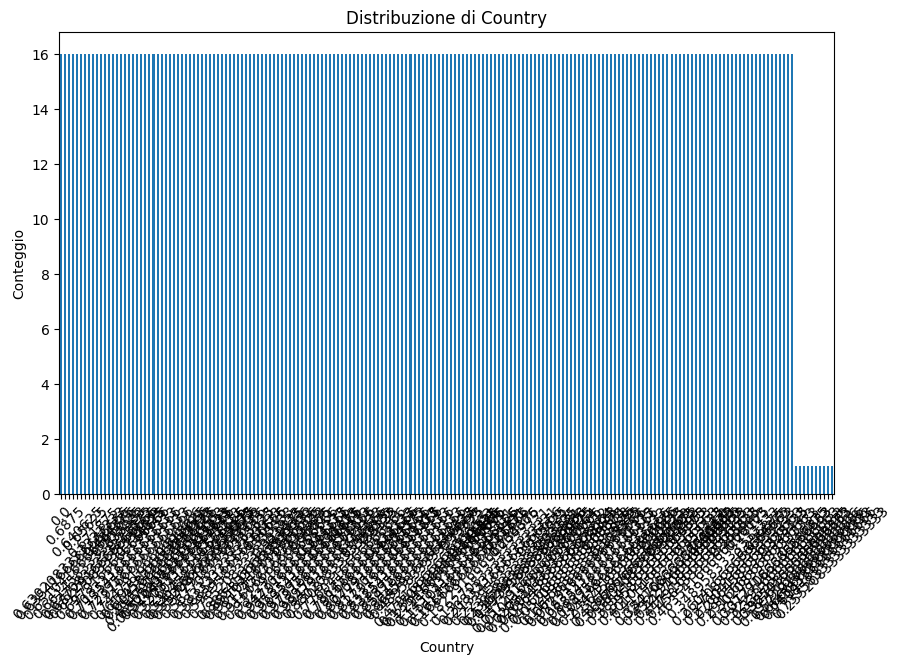


Distribuzione di Status:
Status
1    0.825732
0    0.174268
Name: proportion, dtype: float64


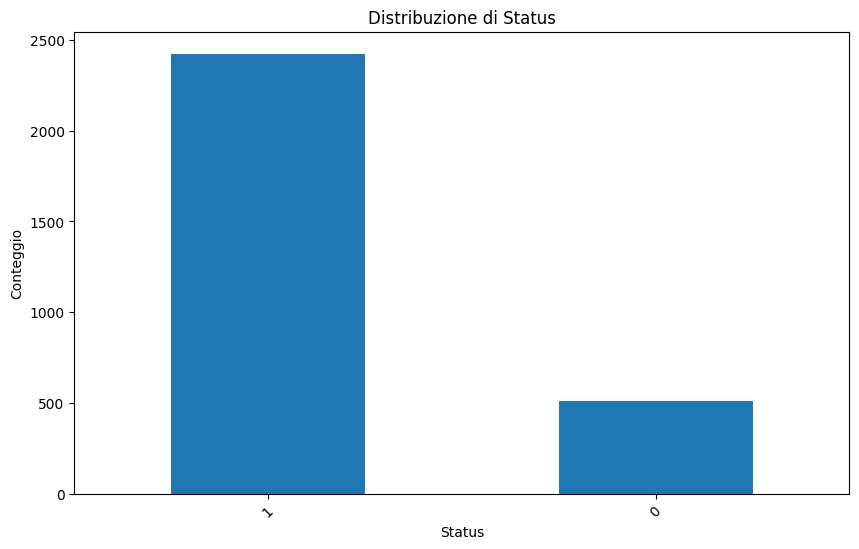

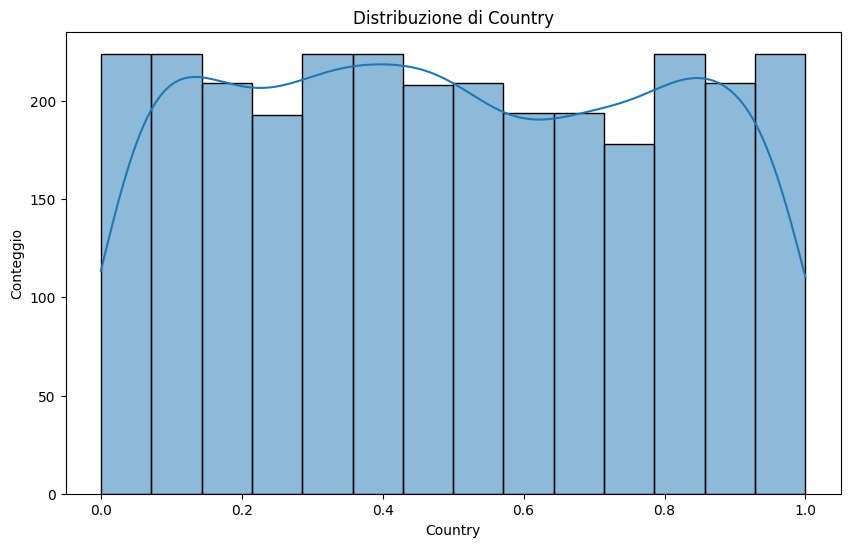

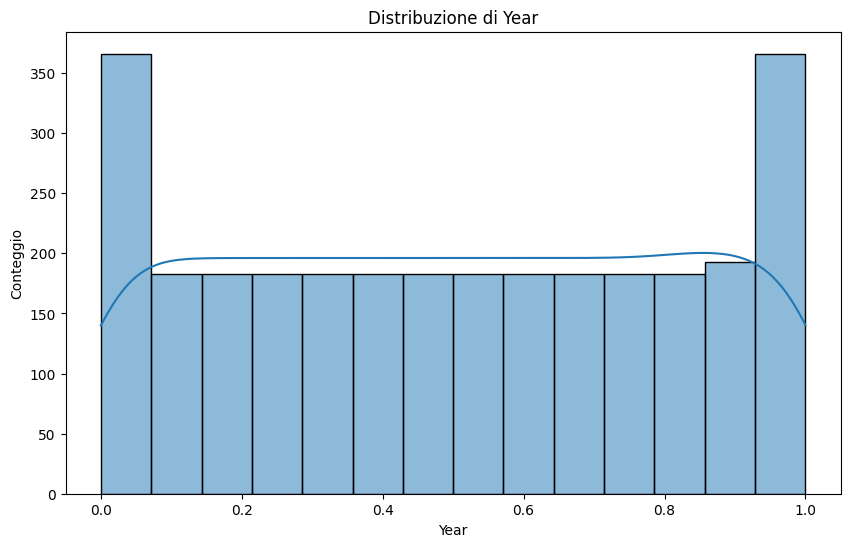

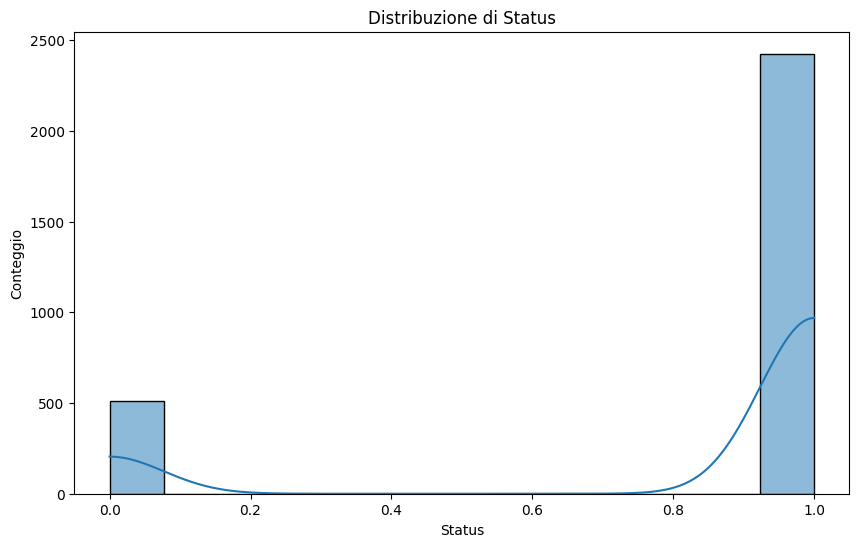

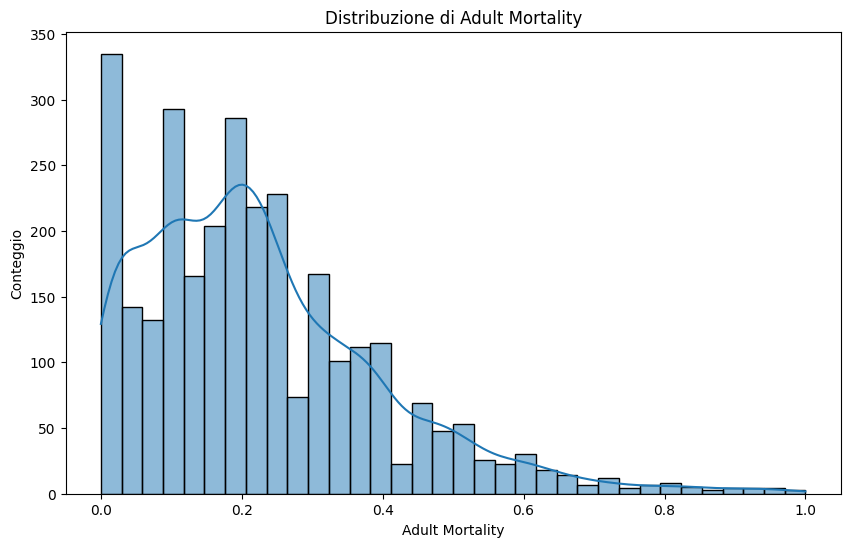

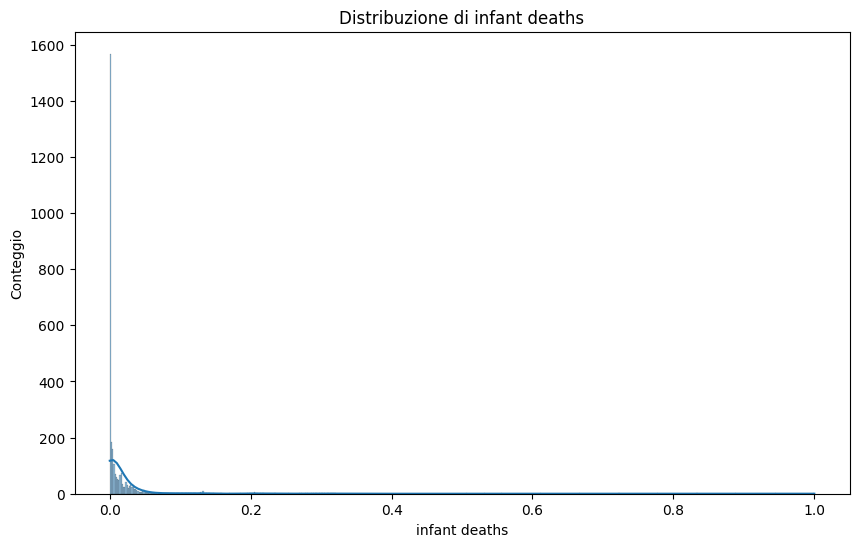

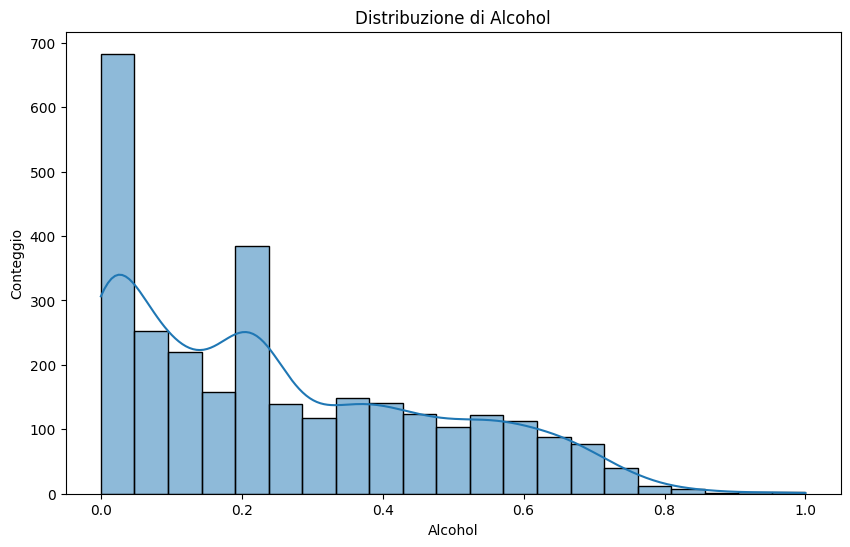

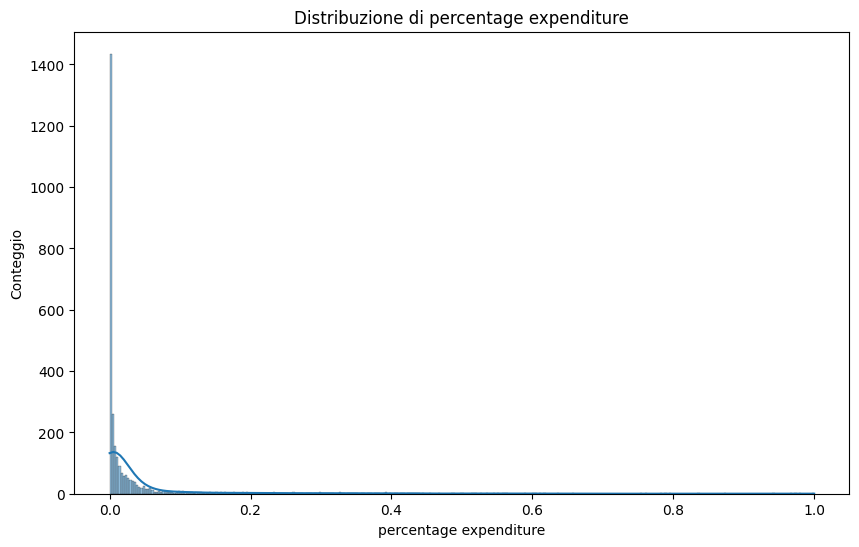

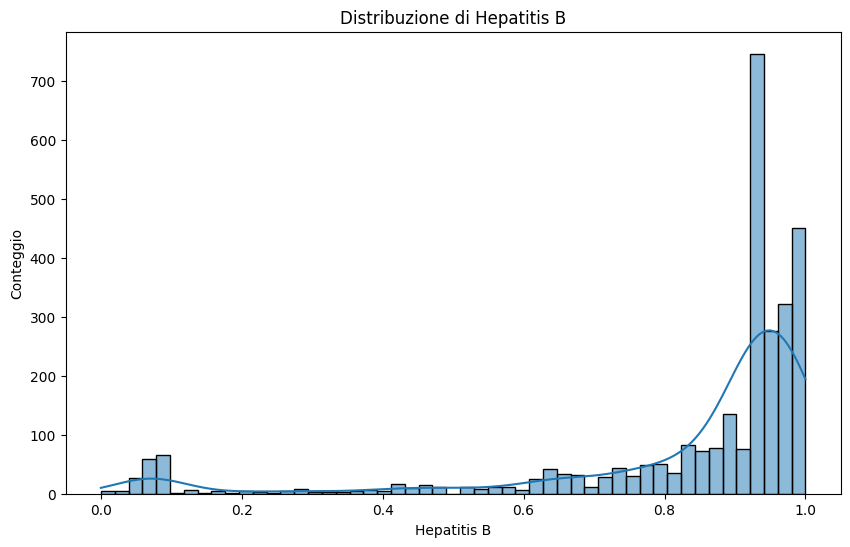

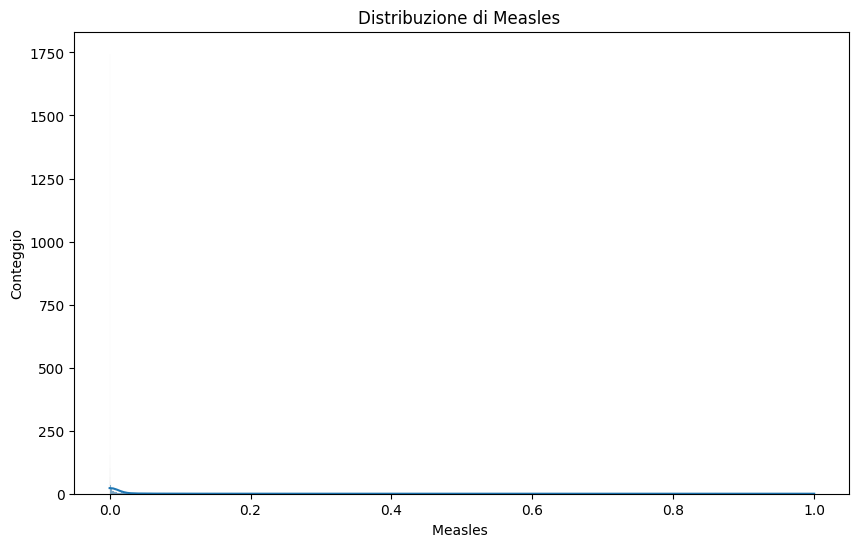

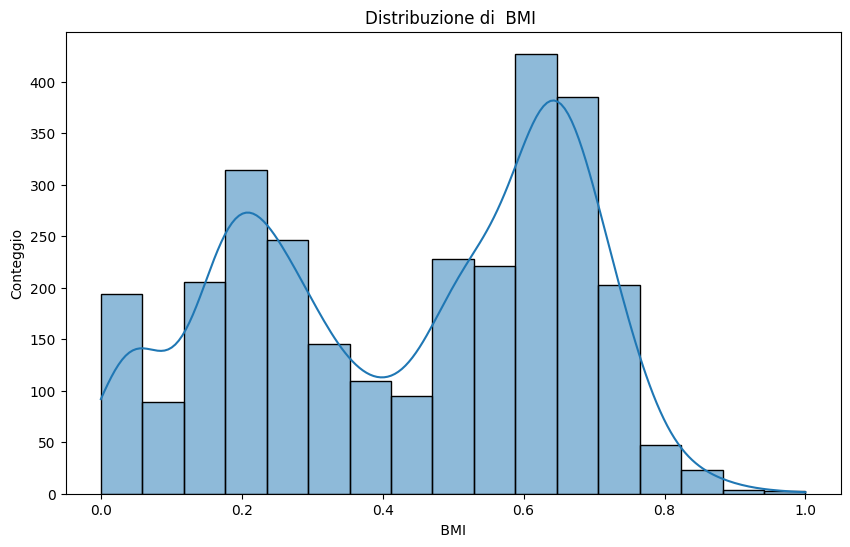

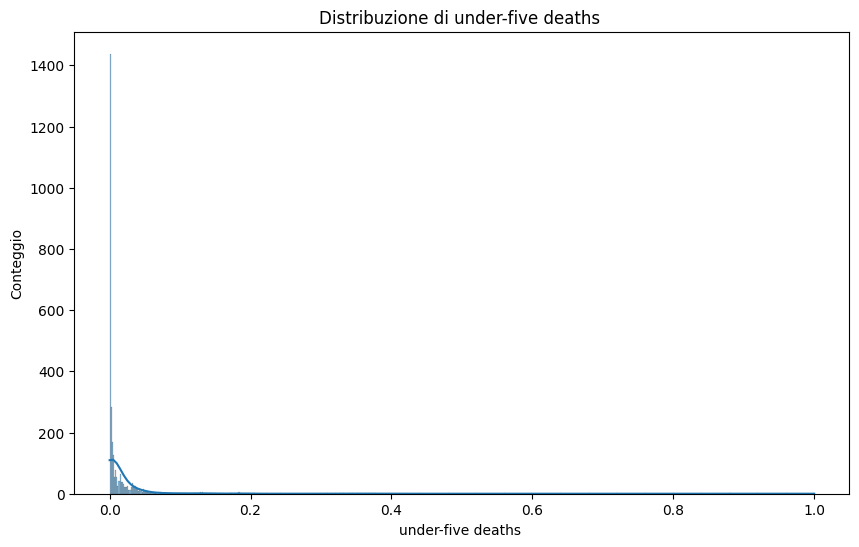

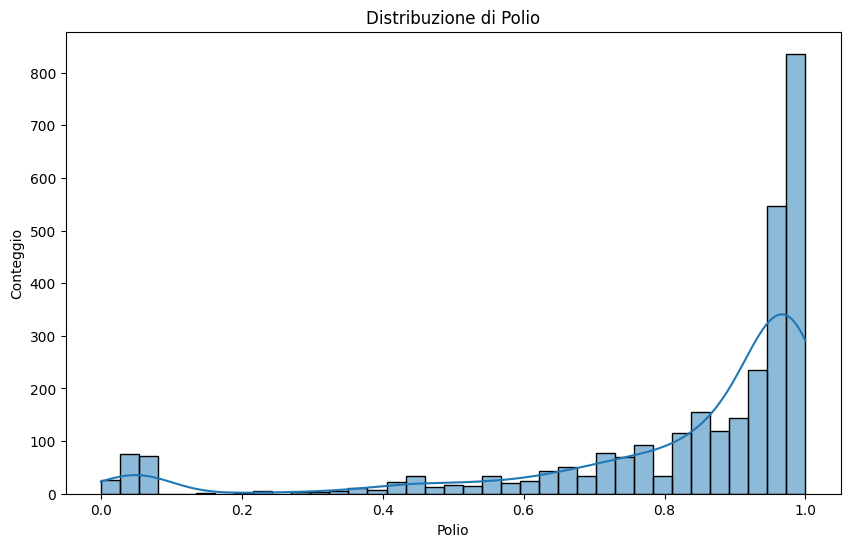

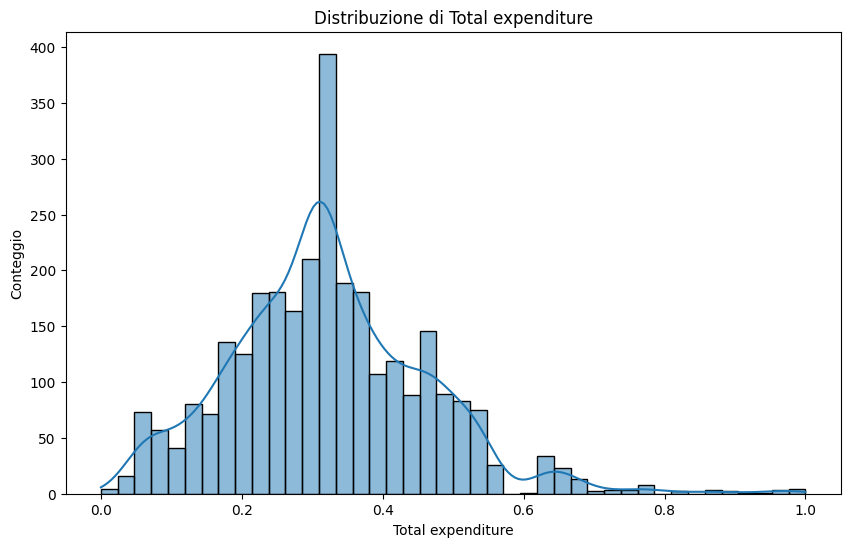

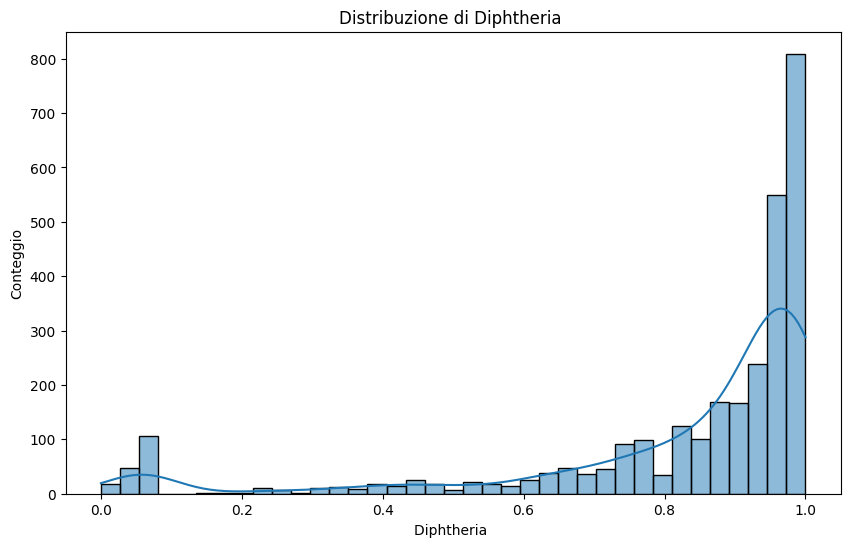

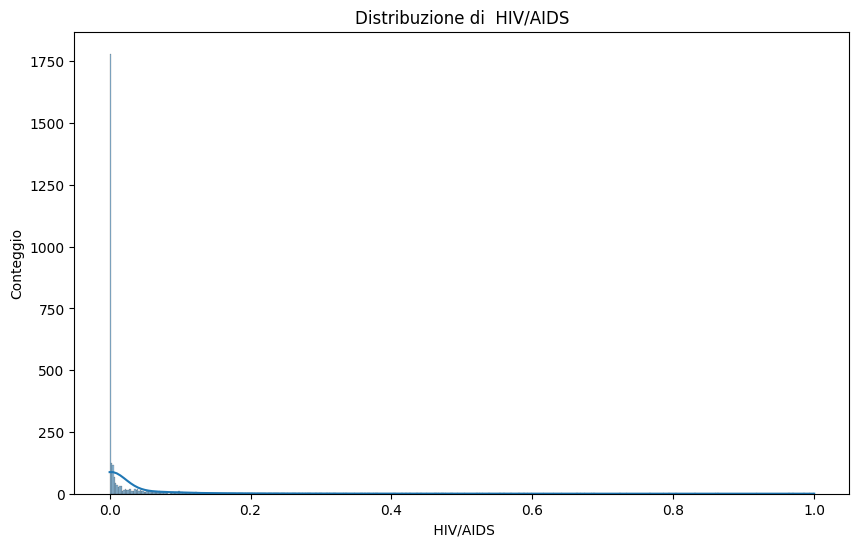

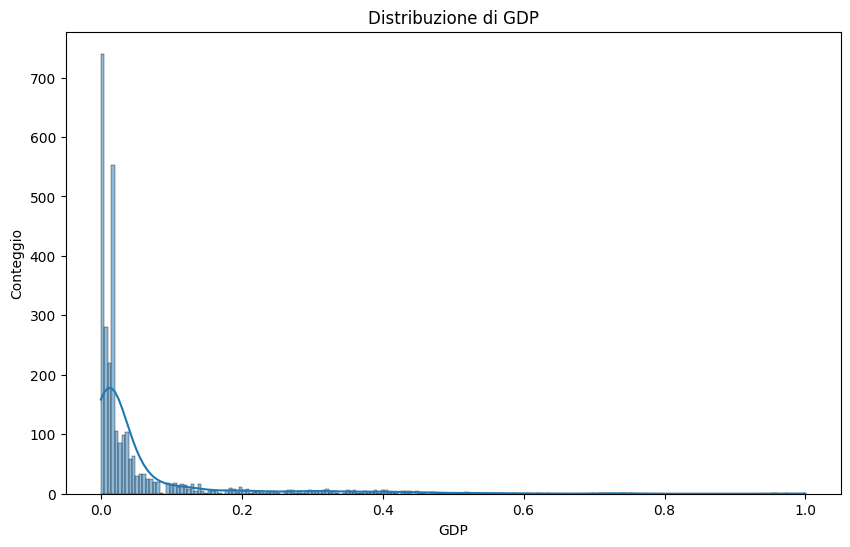

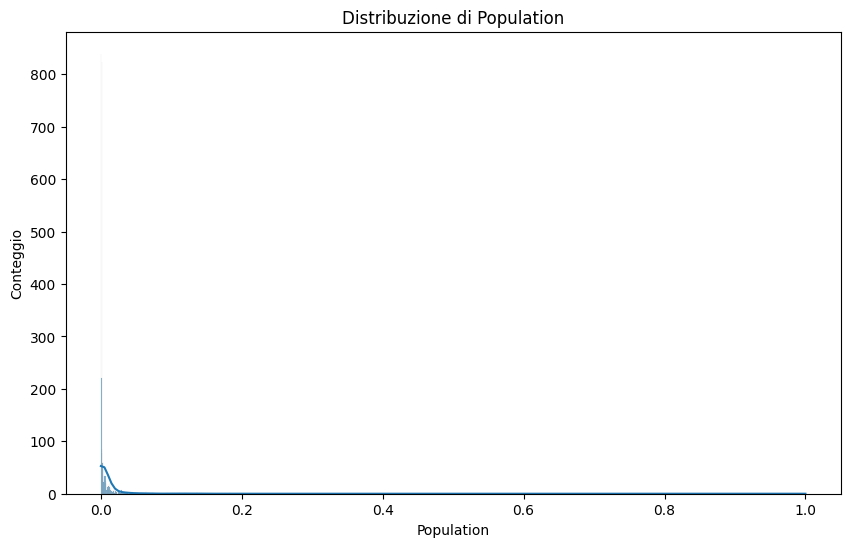

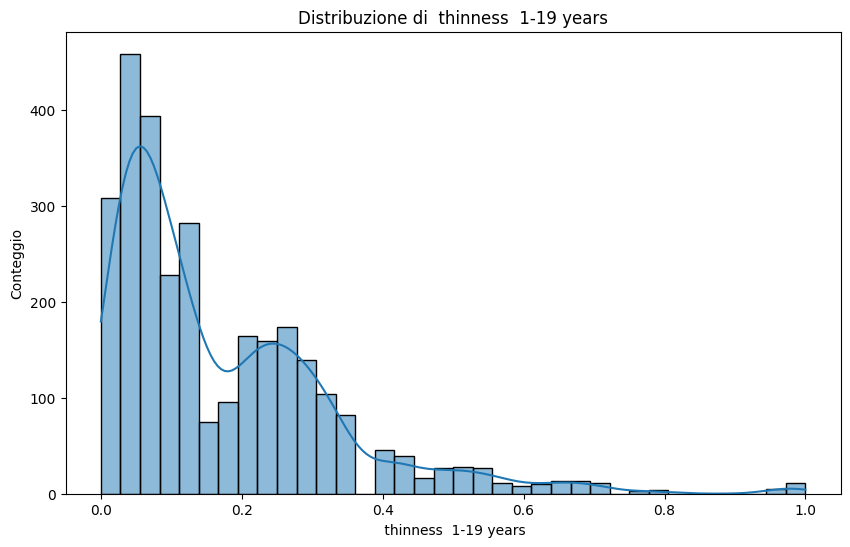

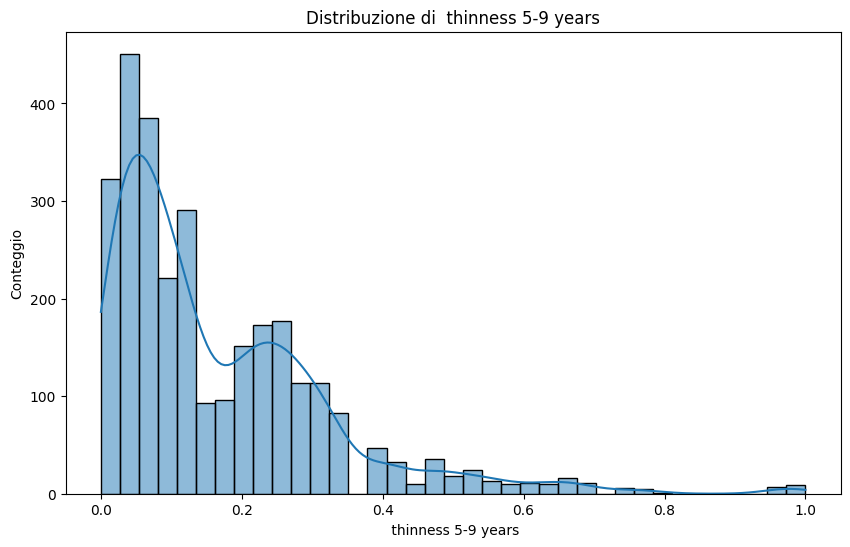

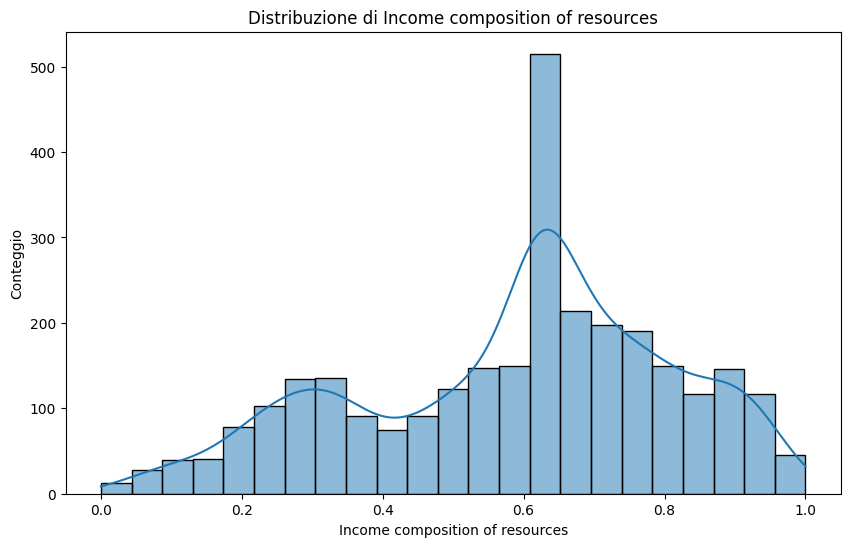

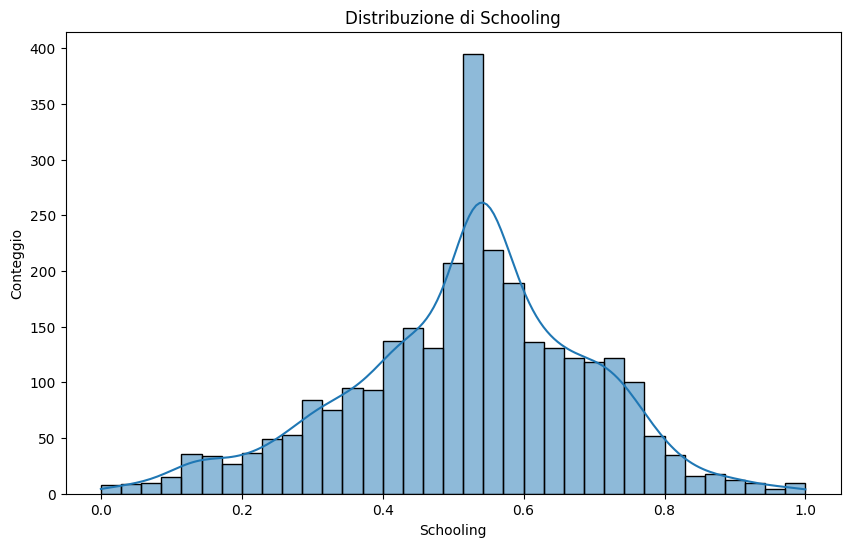

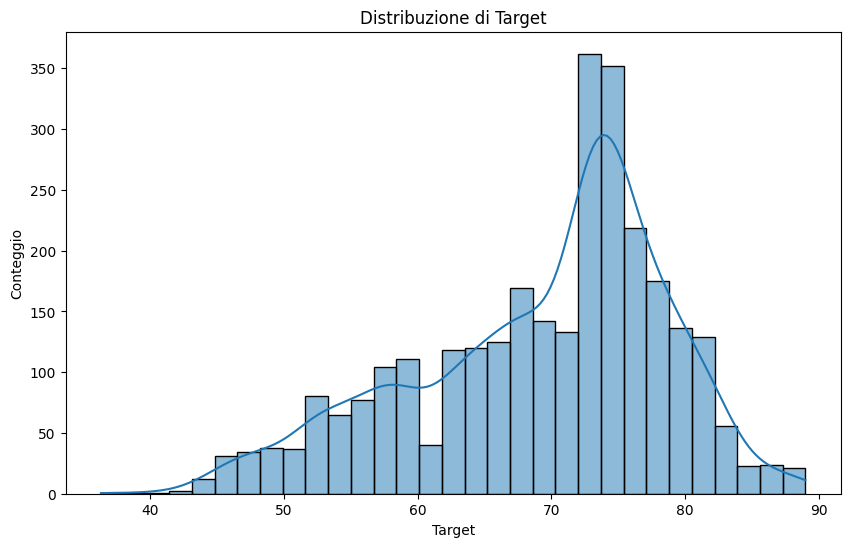


Legenda per l'interpretazione degli indici:
# Una skewness vicina a 0 indica una distribuzione simmetrica, mentre valori più alti indicano sbilanciamento.
# Interpretazione della Skewness:
# Skewness = 0: Distribuzione perfettamente simmetrica.
# Skewness > 0: Distribuzione con una coda lunga verso destra (sbilanciata a destra).
# Skewness < 0: Distribuzione con una coda lunga verso sinistra (sbilanciata a sinistra).
# Valori superiori a |1| sono considerati altamente asimmetrici.
# Interpretazione della Kurtosis:
# Kurtosis ≈ 3: Distribuzione normale (mesocurtica).
# Kurtosis > 3: Distribuzione con code più pronunciate rispetto alla normale (leptocurtica).
# Kurtosis < 3: Distribuzione con code meno pronunciate rispetto alla normale (platicurtica).
# CV < 10%: I dati sono poco dispersi, distribuzione molto bilanciata.
# 10% ≤ CV ≤ 20%: I dati hanno una dispersione moderata, leggera variazione.
# 20% ≤ CV ≤ 50%: Dispersione moderata, la distribuzione è leggermente sbilanciata.
# CV > 

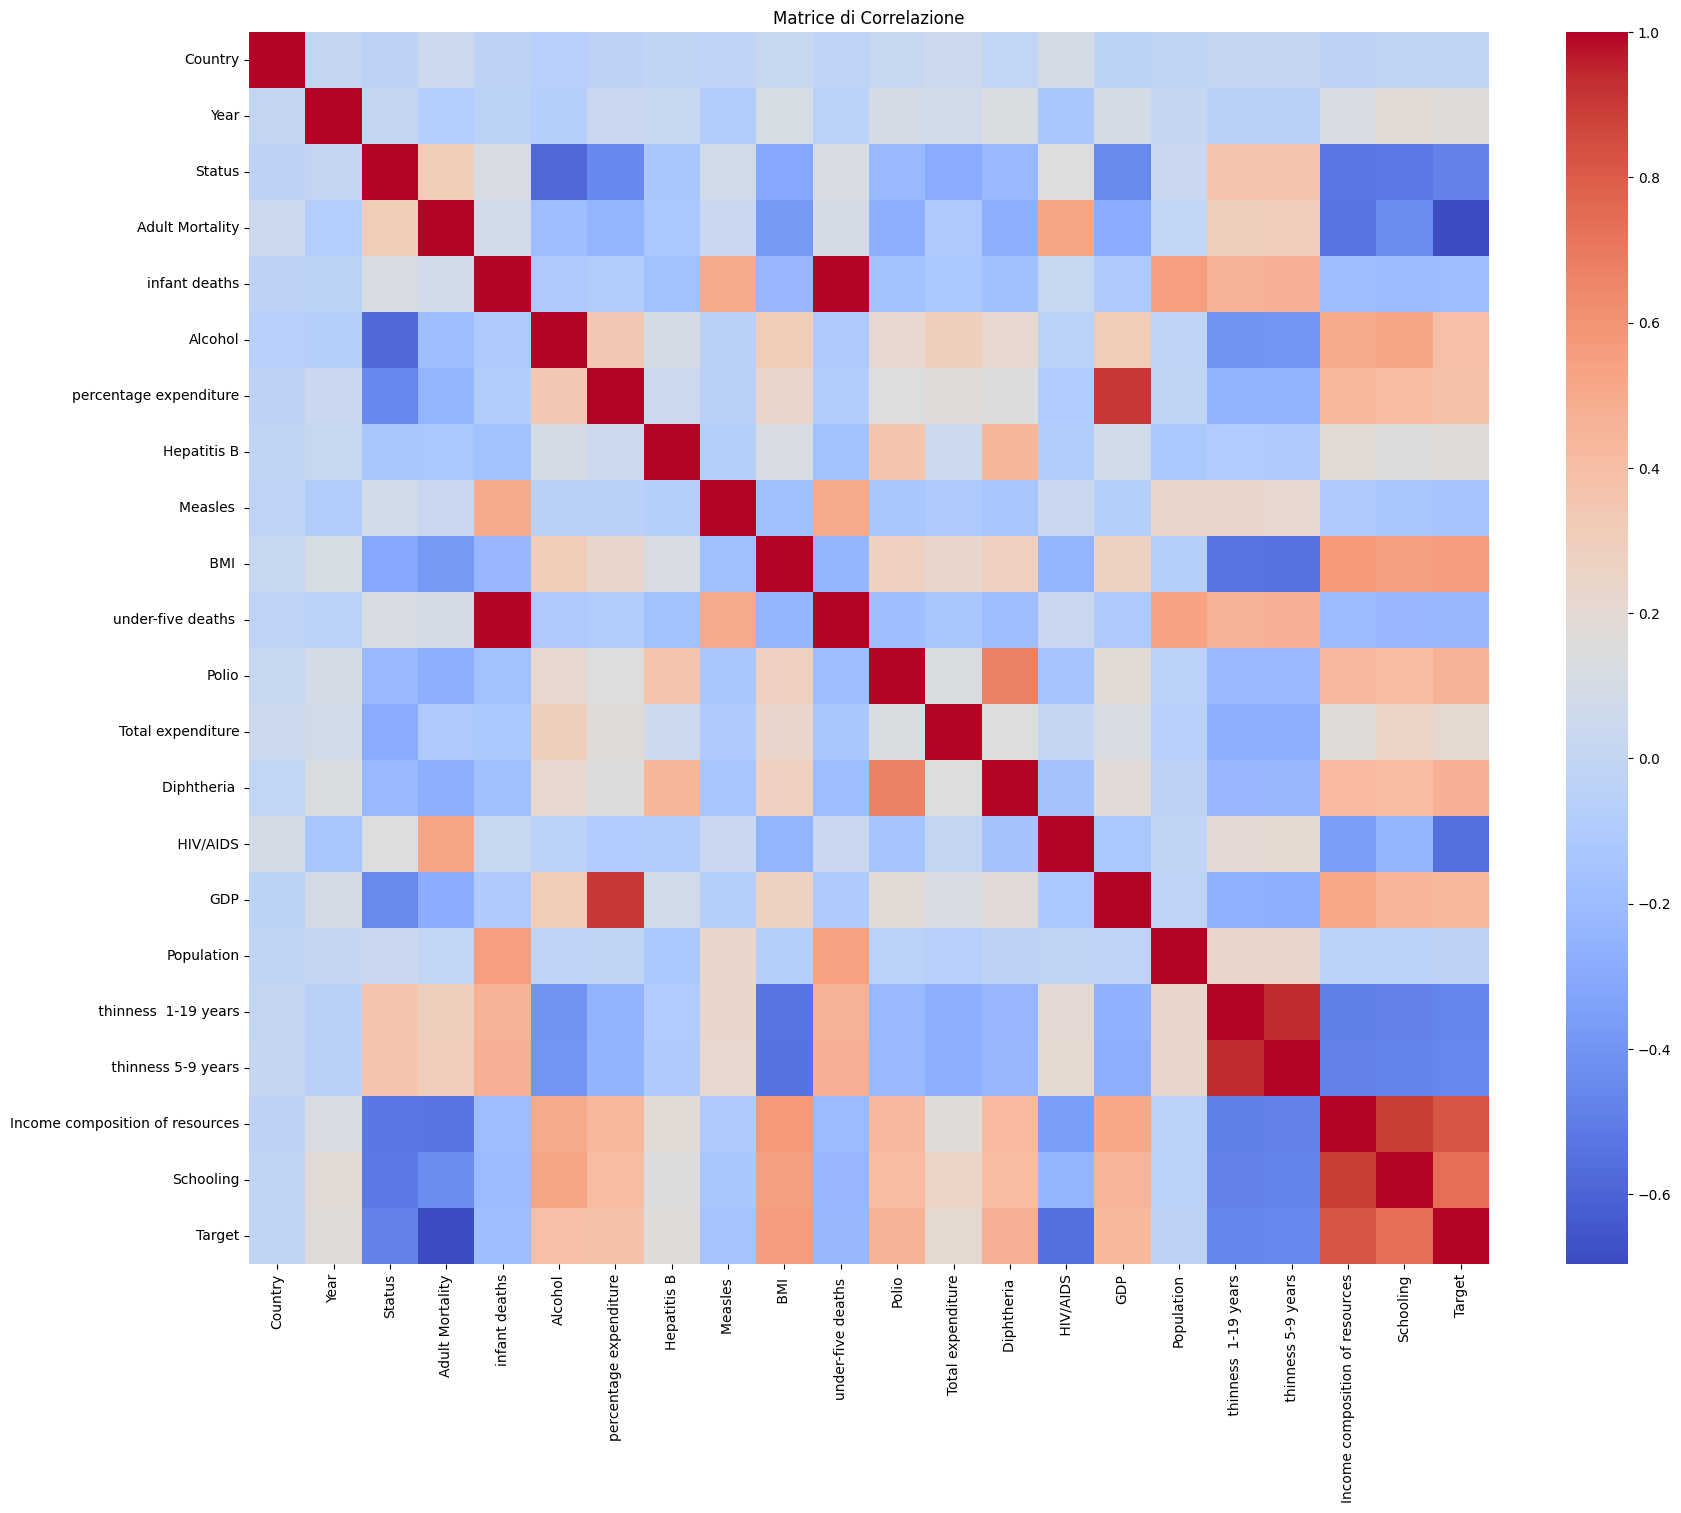

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribuzione di {column}')
    plt.ylabel('Conteggio')
    plt.xticks(rotation=45)
    plt.show()

def plot_numerical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuzione di {column}')
    plt.xlabel(column)
    plt.ylabel('Conteggio')
    plt.show()

def calculate_gini(array):
    array = np.sort(array)
    index = np.arange(1, len(array) + 1)
    n = len(array)
    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))

def calculate_cv(array):
    return np.std(array) / np.mean(array) * 100

# Analisi delle variabili categoriche
categorical_columns = ['Country', 'Status']
for col in categorical_columns:
    print(f"\nDistribuzione di {col}:")
    print(df[col].value_counts(normalize=True))
    plot_categorical_distribution(df, col)

# Calcolo degli indici per le variabili numeriche
numerical_columns = df.select_dtypes(include=[np.number]).columns
summary_stats = {}

for col in numerical_columns:
    data = df[col].dropna().values
    summary_stats[col] = {
        'Gini': calculate_gini(data),
        'Kurtosis': kurtosis(data),
        'Skewness': skew(data),
        'CV (%)': calculate_cv(data)
    }
    plot_numerical_distribution(df, col)

# Creazione della tabella riassuntiva
summary_df = pd.DataFrame.from_dict(summary_stats, orient='index')
summary_df = summary_df.sort_values('Gini', ascending=False)

# Legenda per l'interpretazione
print("\nLegenda per l'interpretazione degli indici:")
print("# Una skewness vicina a 0 indica una distribuzione simmetrica, mentre valori più alti indicano sbilanciamento.")
print("# Interpretazione della Skewness:")
print("# Skewness = 0: Distribuzione perfettamente simmetrica.")
print("# Skewness > 0: Distribuzione con una coda lunga verso destra (sbilanciata a destra).")
print("# Skewness < 0: Distribuzione con una coda lunga verso sinistra (sbilanciata a sinistra).")
print("# Valori superiori a |1| sono considerati altamente asimmetrici.")
print("# Interpretazione della Kurtosis:")
print("# Kurtosis ≈ 3: Distribuzione normale (mesocurtica).")
print("# Kurtosis > 3: Distribuzione con code più pronunciate rispetto alla normale (leptocurtica).")
print("# Kurtosis < 3: Distribuzione con code meno pronunciate rispetto alla normale (platicurtica).")
print("# CV < 10%: I dati sono poco dispersi, distribuzione molto bilanciata.")
print("# 10% ≤ CV ≤ 20%: I dati hanno una dispersione moderata, leggera variazione.")
print("# 20% ≤ CV ≤ 50%: Dispersione moderata, la distribuzione è leggermente sbilanciata.")
print("# CV > 50%: Grande dispersione, la distribuzione è altamente sbilanciata. Questo può indicare che i valori sono molto diversi tra loro rispetto alla media.")

print("\nTabella riassuntiva degli indici per le feature numeriche:")
print(summary_df)

# Matrice di correlazione
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()

In [ ]:
# Splitting del dataset in set di addestramento,validation e test prima di preprocessare
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

#X_test= X_test_standardized
# train is now 70% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
# test is now 15% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(X.shape)
print(y.shape)
print("\nX e y train:")
print(X_train.shape, y_train.shape)
print("\nX e y test:")
print(X_test.shape, y_test.shape)
print("\nX e y validation:")
print(X_val.shape, y_val.shape)

(2938, 21)
(2938,)

X e y train:
(2056, 21) (2056,)

X e y test:
(441, 21) (441,)

X e y validation:
(441, 21) (441,)


#Gestione valori nulli(da fare), outliers

MSE Train dopo rimozione outlier con Isolation Forest: 42.41913692934118
MSE Train dopo rimozione outlier con Elliptic Envelope: 48.36745214681316
MSE Train dopo rimozione outlier con Local Outlier Factor: 18.705653773605867
MSE Validation dopo rimozione outlier con Isolation Forest: 52.350436853850766
MSE Validation dopo rimozione outlier con Elliptic Envelope: 63.13856855336216
MSE Validation dopo rimozione outlier con Local Outlier Factor: 21.91316868813127
MSE Test dopo rimozione outlier con Isolation Forest: 18.875385347472502
MSE Test dopo rimozione outlier con Elliptic Envelope: 49.180206895028604
MSE Test dopo rimozione outlier con Local Outlier Factor: 15.906775916419068
Tecnica con il MSE più basso nel set di train: Local Outlier Factor (MSE: 18.705653773605867)
Tecnica con il MSE più basso nel set di validation: Local Outlier Factor (MSE: 21.91316868813127)
Tecnica con il MSE più basso nel set di test: Local Outlier Factor (MSE: 15.906775916419068)


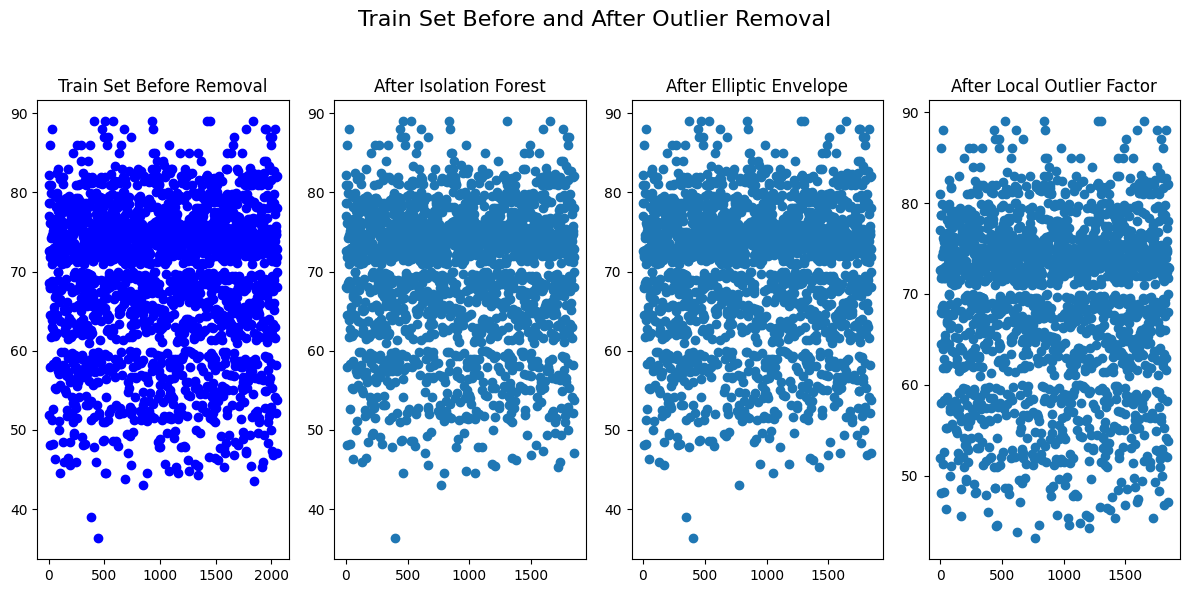

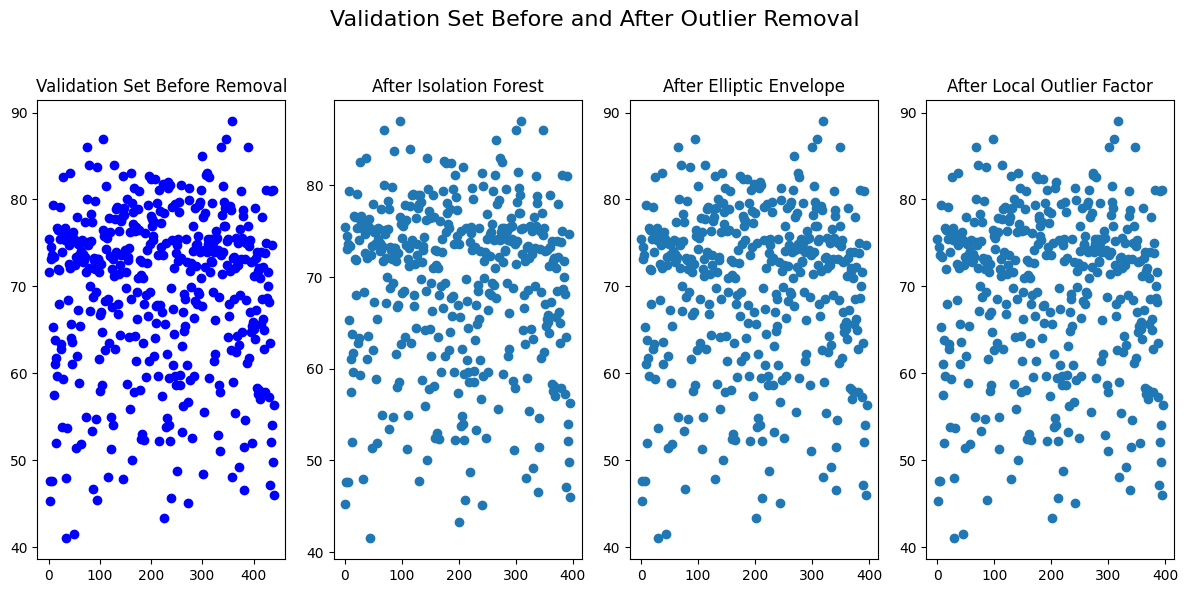

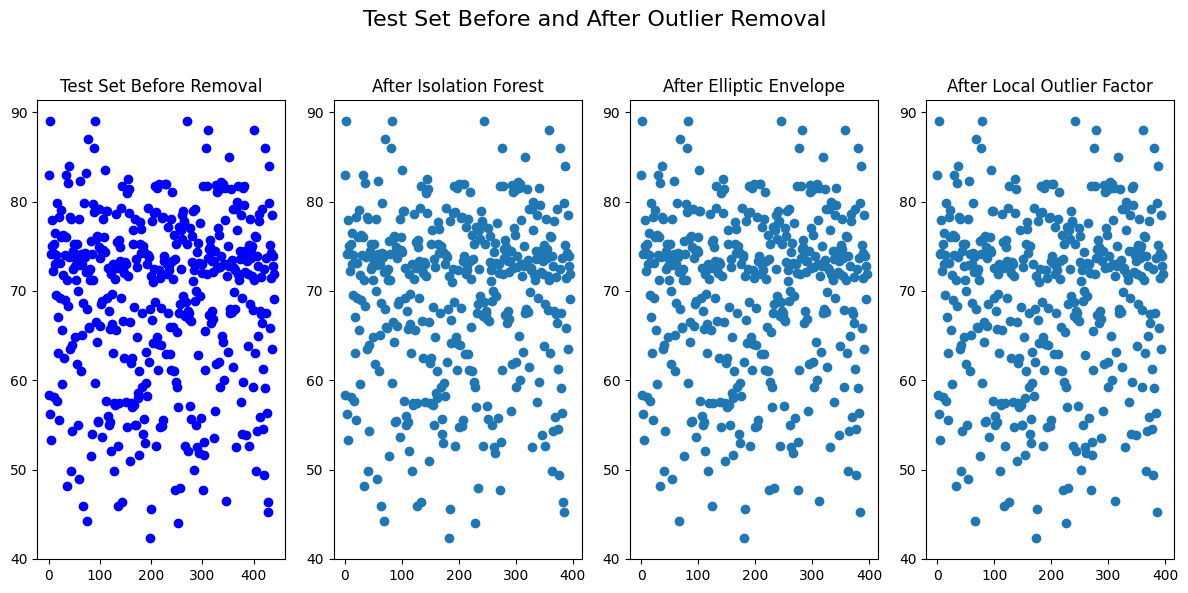

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def remove_outliers(X, y, model, model_name, novelty=False):
    if model_name == 'Local Outlier Factor':
        if novelty:
            # LOF with novelty=True for test data
            yhat = model.fit_predict(X)
        else:
            # LOF with novelty=False for training/validation data
            yhat = model.fit_predict(X)
    else:
        # For other models
        yhat = model.fit_predict(X)

    mask = yhat != -1
    return X[mask], y[mask]

# Modelli di rilevamento outlier
outlier_models = {
    'Isolation Forest': IsolationForest(contamination=0.1, random_state=42),
    'Elliptic Envelope': EllipticEnvelope(contamination=0.1, support_fraction=0.95, random_state=42),
    'Local Outlier Factor': LocalOutlierFactor(contamination=0.1, novelty=False)
}

# Dati originali (assumendo che X_train, X_val, X_test, y_train, y_val, y_test siano già definiti)
datasets = {'Train': (X_train, y_train), 'Validation': (X_val, y_val), 'Test': (X_test, y_test)}
results = {}

# Rimozione outlier e allenamento modelli
for name, (X, y) in datasets.items():
    for model_name, model in outlier_models.items():
        # Determina se siamo sui dati di test
        novelty = (name == 'Test' and model_name == 'Local Outlier Factor')
        X_clean, y_clean = remove_outliers(X.copy(), y.copy(), model, model_name, novelty)
        reg_model = LinearRegression().fit(X_clean, y_clean)
        y_pred = reg_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        results[(name, model_name)] = (X_clean, y_clean, mse)

# Stampa MSE e selezione del migliore
for (dataset, model_name), (_, _, mse) in results.items():
    print(f"MSE {dataset} dopo rimozione outlier con {model_name}: {mse}")

# Determinazione della tecnica con il MSE più basso per ogni set di dati
for dataset in ['Train', 'Validation', 'Test']:
    mse_values = {model_name: results[(dataset, model_name)][2] for model_name in outlier_models.keys()}
    best_technique = min(mse_values, key=mse_values.get)
    print(f'Tecnica con il MSE più basso nel set di {dataset.lower()}: {best_technique} (MSE: {mse_values[best_technique]})')

# Visualizzazione dei risultati
for name, (X, y) in datasets.items():
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'{name} Set Before and After Outlier Removal', fontsize=16)

    plt.subplot(1, len(outlier_models) + 1, 1)
    plt.scatter(range(len(y)), y, color='blue')
    plt.title(f'{name} Set Before Removal')

    for i, (model_name, _) in enumerate(outlier_models.items(), 2):
        X_clean, y_clean = results[(name, model_name)][:2]
        plt.subplot(1, len(outlier_models) + 1, i)
        plt.scatter(range(len(y_clean)), y_clean, label=model_name)
        plt.title(f'After {model_name}')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [ ]:
print("Nuovi shape dei vari dataset:")
print("X_train:")
print(X_train.shape)
print("X_validation")
print(X_val.shape)
print("X_test")
print(X_test.shape)
print("Y_train:")
print(y_train.shape)
print("Y_validation")
print(y_val.shape)
print("Y_test")
print(y_test.shape)

Nuovi shape dei vari dataset:
X_train:
(2056, 21)
X_validation
(441, 21)
X_test
(441, 21)
Y_train:
(2056,)
Y_validation
(441,)
Y_test
(441,)


In [ ]:
print("Numero di feature in X_train:", X_train.shape[1])

Numero di feature in X_train: 21


Mean Squared Error su set di convalida (Regressione Lineare): 14.848563720799937
Mean Squared Error su set di test (Regressione Lineare): 16.692700966294204


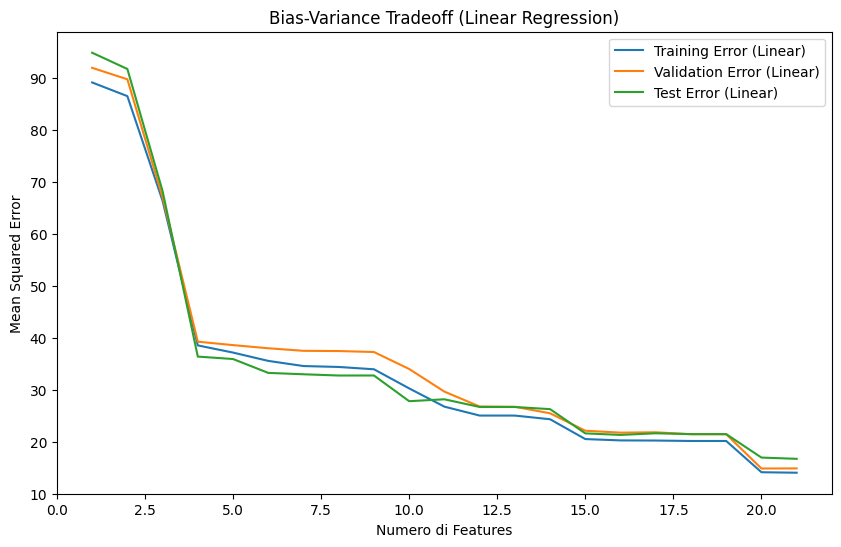

Mean Squared Error su set di convalida (Ridge): 16.032361021475825
Mean Squared Error su set di test (Ridge): 16.155001142133834


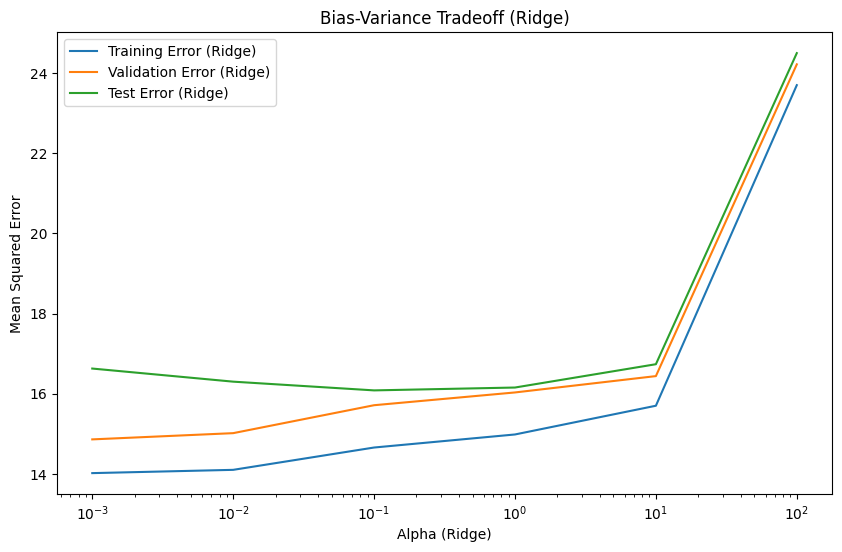

Mean Squared Error su set di convalida (Lasso): 51.12083174719711
Mean Squared Error su set di test (Lasso): 53.00451506098996


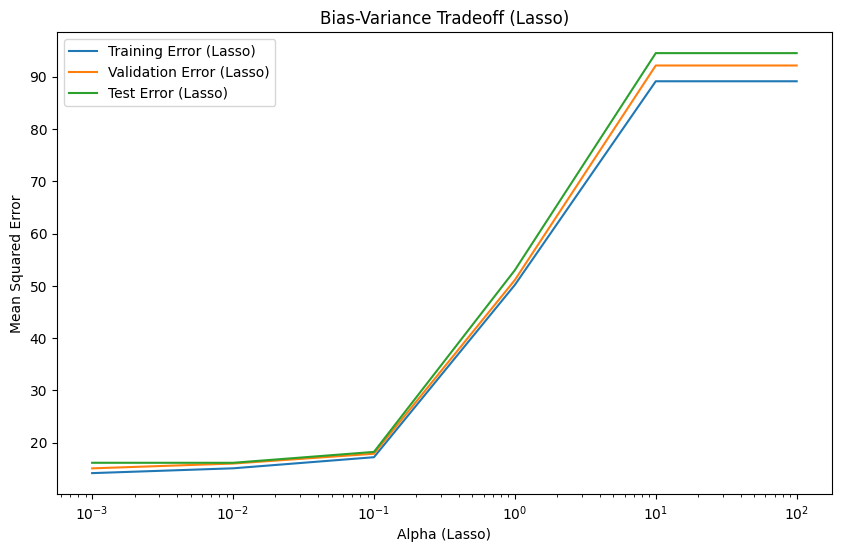

Mean Squared Error su set di convalida (Elastic Net): 71.35557078424998
Mean Squared Error su set di test (Elastic Net): 72.93202196697017


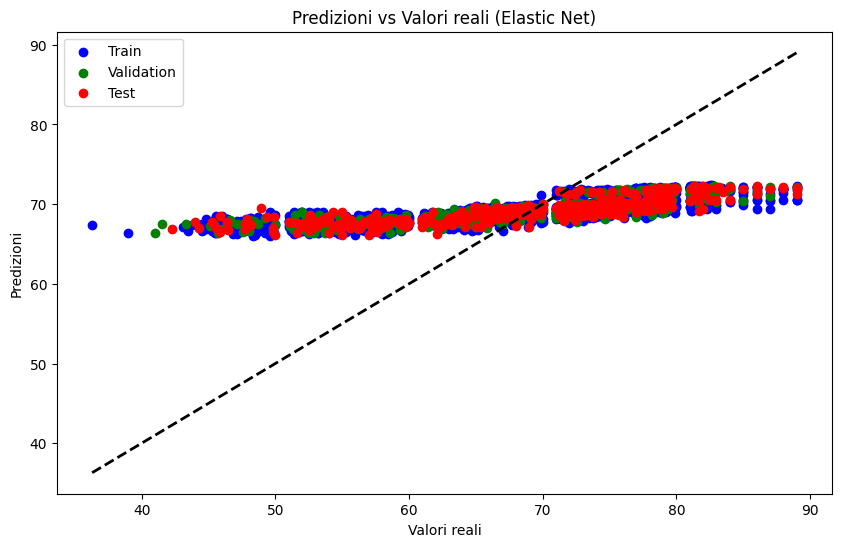

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#il training test deve essere sempre monotono decrescente
X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

def bias_variance_tradeoff(X_train, X_val, X_test, y_train, y_val, y_test, model):
    train_errors = []
    val_errors = []
    test_errors = []
    complexities = []

    for i in range(1, X_train.shape[1] + 1):
        model.fit(X_train[:, :i], y_train)
        train_errors.append(mean_squared_error(y_train, model.predict(X_train[:, :i])))
        val_errors.append(mean_squared_error(y_val, model.predict(X_val[:, :i])))
        test_errors.append(mean_squared_error(y_test, model.predict(X_test[:, :i])))
        complexities.append(i)

    min_val_error_index = np.argmin(val_errors)

    if min_val_error_index == len(val_errors) - 1:
        val_error_sign = 0
    else:
        val_error_sign = val_errors[min_val_error_index] - val_errors[min_val_error_index + 1]

    return complexities, train_errors, val_errors, test_errors, min_val_error_index, val_error_sign

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

val_predictions_linear = linear_model.predict(X_val)
val_mse_linear = mean_squared_error(y_val, val_predictions_linear)
print("Mean Squared Error su set di convalida (Regressione Lineare):", val_mse_linear)

test_predictions_linear = linear_model.predict(X_test)
test_mse_linear = mean_squared_error(y_test, test_predictions_linear)
print("Mean Squared Error su set di test (Regressione Lineare):", test_mse_linear)

complexities_linear, train_errors_linear, val_errors_linear, test_errors_linear, min_val_error_index_linear, val_error_sign_linear = bias_variance_tradeoff(X_train, X_val, X_test, y_train, y_val, y_test, linear_model)

plt.figure(figsize=(10, 6))
plt.plot(complexities_linear, train_errors_linear, label='Training Error (Linear)')
plt.plot(complexities_linear, val_errors_linear, label='Validation Error (Linear)')
plt.plot(complexities_linear, test_errors_linear, label='Test Error (Linear)')
plt.xlabel('Numero di Features')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff (Linear Regression)')
plt.legend()

if val_error_sign_linear >= 0:
    plt.scatter(complexities_linear[min_val_error_index_linear], val_errors_linear[min_val_error_index_linear], color='red', marker='o', label='Stop Decreasing (Linear)')
    plt.text(complexities_linear[min_val_error_index_linear], val_errors_linear[min_val_error_index_linear], f'Features: {complexities_linear[min_val_error_index_linear]}', verticalalignment='bottom', horizontalalignment='left', fontsize=10)

plt.show()

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

val_predictions_ridge = ridge_model.predict(X_val)
val_mse_ridge = mean_squared_error(y_val, val_predictions_ridge)
print("Mean Squared Error su set di convalida (Ridge):", val_mse_ridge)

test_predictions_ridge = ridge_model.predict(X_test)
test_mse_ridge = mean_squared_error(y_test, test_predictions_ridge)
print("Mean Squared Error su set di test (Ridge):", test_mse_ridge)

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
train_errors_ridge = []
val_errors_ridge = []
test_errors_ridge = []

for alpha in alphas:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)
    train_errors_ridge.append(mean_squared_error(y_train, model_ridge.predict(X_train)))
    val_errors_ridge.append(mean_squared_error(y_val, model_ridge.predict(X_val)))
    test_errors_ridge.append(mean_squared_error(y_test, model_ridge.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors_ridge, label='Training Error (Ridge)')
plt.plot(alphas, val_errors_ridge, label='Validation Error (Ridge)')
plt.plot(alphas, test_errors_ridge, label='Test Error (Ridge)')
plt.xlabel('Alpha (Ridge)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff (Ridge)')
plt.xscale('log')
plt.legend()
plt.show()

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

val_predictions_lasso = lasso_model.predict(X_val)
val_mse_lasso = mean_squared_error(y_val, val_predictions_lasso)
print("Mean Squared Error su set di convalida (Lasso):", val_mse_lasso)

test_predictions_lasso = lasso_model.predict(X_test)
test_mse_lasso = mean_squared_error(y_test, test_predictions_lasso)
print("Mean Squared Error su set di test (Lasso):", test_mse_lasso)

train_errors_lasso = []
val_errors_lasso = []
test_errors_lasso = []

for alpha in alphas:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train)
    train_errors_lasso.append(mean_squared_error(y_train, model_lasso.predict(X_train)))
    val_errors_lasso.append(mean_squared_error(y_val, model_lasso.predict(X_val)))
    test_errors_lasso.append(mean_squared_error(y_test, model_lasso.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors_lasso, label='Training Error (Lasso)')
plt.plot(alphas, val_errors_lasso, label='Validation Error (Lasso)')
plt.plot(alphas, test_errors_lasso, label='Test Error (Lasso)')
plt.xlabel('Alpha (Lasso)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff (Lasso)')
plt.xscale('log')
plt.legend()
plt.show()

# Elastic Net
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)

val_predictions_en = elastic_net_model.predict(X_val)
val_mse_en = mean_squared_error(y_val, val_predictions_en)
print("Mean Squared Error su set di convalida (Elastic Net):", val_mse_en)

test_predictions_en = elastic_net_model.predict(X_test)
test_mse_en = mean_squared_error(y_test, test_predictions_en)
print("Mean Squared Error su set di test (Elastic Net):", test_mse_en)

# Plot delle predizioni vs valori reali per Elastic Net
plt.figure(figsize=(10, 6))
plt.scatter(y_train, elastic_net_model.predict(X_train), color='blue', label='Train')
plt.scatter(y_val, val_predictions_en, color='green', label='Validation')
plt.scatter(y_test, test_predictions_en, color='red', label='Test')
plt.plot([min(y_train.min(), y_val.min(), y_test.min()), max(y_train.max(), y_val.max(), y_test.max())],
         [min(y_train.min(), y_val.min(), y_test.min()), max(y_train.max(), y_val.max(), y_test.max())], 'k--', lw=2)

plt.xlabel('Valori reali')
plt.ylabel('Predizioni')
plt.title('Predizioni vs Valori reali (Elastic Net)')
plt.legend()
plt.show()

In [ ]:
X= X_train
y= y_train

### Defining the Artificial Neural Network

In [ ]:
#ANN
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow import keras
from keras.layers import Dense, Input
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

def ANN(optimizer = 'adam',neurons=32,batch_size=32,epochs=50,activation='relu',patience=5,loss='mse'):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Input layer with input shape
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience = patience) # early stop patience
    history = model.fit(X, y,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = [early_stopping],
              verbose=0) #verbose set to 1 will show the training process
    return model

## Baseline Machine Learning Models: Regressors with Default Hyperparameters

### Using 3-Fold Cross-Validation

In [ ]:
import tensorflow as tf

@tf.function(reduce_retracing =True)
def predict_with_model(model, X):
    return model.predict(X)

results = []

# 3-Fold Cross-Validation
# Random Forest
clf_rf = RandomForestRegressor()
start_time = time.time()
scores_rf_mse = cross_val_score(clf_rf, X, y, cv=3, scoring='neg_mean_squared_error')
scores_rf_r2 = cross_val_score(clf_rf, X, y, cv=3, scoring='r2')
elapsed_time_rf = round(time.time() - start_time, 2)
results.append({'Algorithm': 'Random Forest',
                'MSE': -scores_rf_mse.mean(),
                'R²': scores_rf_r2.mean(),
                'Time Elapsed (s)': elapsed_time_rf})

# SVM
clf_svm = SVR()
start_time = time.time()
scores_svm_mse = cross_val_score(clf_svm, X, y, cv=3, scoring='neg_mean_squared_error')
scores_svm_r2 = cross_val_score(clf_svm, X, y, cv=3, scoring='r2')
elapsed_time_svm = round(time.time() - start_time, 2)
results.append({'Algorithm': 'SVM',
                'MSE': -scores_svm_mse.mean(),
                'R²': scores_svm_r2.mean(),
                'Time Elapsed (s)': elapsed_time_svm})

# KNN
clf_knn = KNeighborsRegressor()
start_time = time.time()
scores_knn_mse = cross_val_score(clf_knn, X, y, cv=3, scoring='neg_mean_squared_error')
scores_knn_r2 = cross_val_score(clf_knn, X, y, cv=3, scoring='r2')
elapsed_time_knn = round(time.time() - start_time, 2)
results.append({'Algorithm': 'KNN',
                'MSE': -scores_knn_mse.mean(),
                'R²': scores_knn_r2.mean(),
                'Time Elapsed (s)': elapsed_time_knn})

# ANN
start_time = time.time()
clf_ann = KerasRegressor(model=ANN, epochs=10, batch_size=10, verbose=0)
scores_ann_mse = cross_val_score(clf_ann, X, y, cv=3, scoring='neg_mean_squared_error')
scores_ann_r2 = cross_val_score(clf_ann, X, y, cv=3, scoring='r2')
elapsed_time_ann = round(time.time() - start_time, 2)
results.append({'Algorithm': 'ANN',
                'MSE': -scores_ann_mse.mean(),
                'R²': scores_ann_r2.mean(),
                'Time Elapsed (s)': elapsed_time_ann})

results_df_3_fold = pd.DataFrame(results)
print("Results for 3-Fold Cross-Validation")
print(results_df_3_fold.to_string(index=False))

Results for 3-Fold Cross-Validation
    Algorithm       MSE       R²  Time Elapsed (s)
Random Forest  4.212946 0.952961             25.75
          SVM 15.179601 0.829707              2.11
          KNN 11.728416 0.868422              0.11
          ANN 12.667394 0.843278             78.42


## HPO Algorithm 1: Grid Search
Search all the given hyper-parameter configurations

**Advantages:**
* Simple implementation.  

**Disadvantages:**  
* Time-consuming,
* Only efficient with categorical HPs.

In [ ]:
#Grid Search
#about 38 minutes to run
# Inizializza i dati per la tabella
results_grid_search = []

from sklearn.metrics import r2_score

# Random Forest
rf_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [15, 20, 30, 50]
}
clf_rf = RandomForestRegressor(random_state=0)
start_time = time.time()
grid_rf = GridSearchCV(clf_rf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time, 2)
y_pred_rf = grid_rf.best_estimator_.predict(X)
r2_rf = r2_score(y, y_pred_rf)
results_grid_search.append({'Algorithm': 'Random Forest', 'Best Params': grid_rf.best_params_, 'MSE': -grid_rf.best_score_, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time_rf})

# SVM
svm_params = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'epsilon': [0.01, 0.1, 1]
}
clf_svm = SVR(gamma='scale')
start_time = time.time()
grid_svm = GridSearchCV(clf_svm, svm_params, cv=3, scoring='neg_mean_squared_error')
grid_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time, 2)
y_pred_svm = grid_svm.best_estimator_.predict(X)
r2_svm = r2_score(y, y_pred_svm)
results_grid_search.append({'Algorithm': 'SVM', 'Best Params': grid_svm.best_params_, 'MSE': -grid_svm.best_score_, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time_svm})

# KNN
knn_params = {
    'n_neighbors': [2, 3, 5, 7, 10]
}
clf_knn = KNeighborsRegressor()
start_time = time.time()
grid_knn = GridSearchCV(clf_knn, knn_params, cv=3, scoring='neg_mean_squared_error')
grid_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time, 2)
y_pred_knn = grid_knn.best_estimator_.predict(X)
r2_knn = r2_score(y, y_pred_knn)
results_grid_search.append({'Algorithm': 'KNN', 'Best Params': grid_knn.best_params_, 'MSE': -grid_knn.best_score_, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time_knn})

#ANN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop'],
    'activation': ['relu','tanh'],
    'loss': ['mse'],
    'batch_size': [16,32],
    'neurons':[16,32],
    'epochs':[20,50],
    'patience':[2,5]
}

start_time = time.time()
clf = KerasRegressor(model=ANN, activation='relu', neurons=16, patience=2, verbose=3)
grid_ann = GridSearchCV(clf, rf_params, cv=3, n_jobs=-1,scoring='neg_mean_squared_error')
grid_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time, 2)
y_pred_ann = grid_ann.best_estimator_.predict(X)
r2_ann = r2_score(y, y_pred_ann)
results_grid_search.append({'Algorithm': 'ANN', 'Best Params': grid_ann.best_params_, 'MSE': -grid_ann.best_score_, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time_ann})

results_df_grid_search = pd.DataFrame(results_grid_search)

print("Results for Grid Search")
print(results_df_grid_search.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Results for Grid Search
    Algorithm                                                                                                                 Best Params       MSE       R²  Time Elapsed (s)
Random Forest                                                                                       {'max_depth': 20, 'n_estimators': 30}  4.392258 0.993335             17.59
          SVM                      

## HPO Algorithm 2: Random Search
Randomly search hyper-parameter combinations in the search space

**Advantages:**
* More efficient than GS.
* Enable parallelization.

**Disadvantages:**  
* Not consider previous results.
* Not efficient with conditional HPs.

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Input
from scipy.stats import uniform

# Inizializza i dati per la tabella
results_random_search = []

# Random Forest
rf_params = {
    'n_estimators': sp_randint(10, 100),
    'max_features': sp_randint(1, 13),
    'max_depth': sp_randint(5, 50),
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11),
    'criterion': ['friedman_mse', 'poisson', 'squared_error', 'absolute_error']
}
n_iter_search = 20
clf_rf = RandomForestRegressor(random_state=0)
start_time = time.time()
Random_rf = RandomizedSearchCV(clf_rf, param_distributions=rf_params, n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
Random_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time, 2)
y_pred_rf = Random_rf.best_estimator_.predict(X)
r2_rf = r2_score(y, y_pred_rf)
results_random_search.append({'Algorithm': 'Random Forest', 'Best Params': Random_rf.best_params_, 'MSE': -Random_rf.best_score_, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time_rf})

# SVM
svm_params = {
    'C': uniform(0, 50),
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'epsilon': uniform(0, 1)
}
n_iter_search = 20
clf_svm = SVR(gamma='scale')
start_time = time.time()
Random_svm = RandomizedSearchCV(clf_svm, param_distributions=svm_params, n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
Random_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time, 2)
y_pred_svm = Random_svm.best_estimator_.predict(X)
r2_svm = r2_score(y, y_pred_svm)
results_random_search.append({'Algorithm': 'SVM', 'Best Params': Random_svm.best_params_, 'MSE': -Random_svm.best_score_, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time_svm})

# KNN
knn_params = {
    'n_neighbors': sp_randint(1, 20),
}
n_iter_search = 10
clf_knn = KNeighborsRegressor()
start_time = time.time()
Random_knn = RandomizedSearchCV(clf_knn, param_distributions=knn_params, n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
Random_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time, 2)
y_pred_knn = Random_knn.best_estimator_.predict(X)
r2_knn = r2_score(y, y_pred_knn)
results_random_search.append({'Algorithm': 'KNN', 'Best Params': Random_knn.best_params_, 'MSE': -Random_knn.best_score_, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time_knn})

def ANN(optimizer='adam', neurons=32, batch_size=32, epochs=50, activation='relu', patience=5, loss='mse'):
    input_layer = Input(shape=(X.shape[1],))
    model = Dense(neurons, activation=activation)(input_layer)
    model = Dense(neurons, activation=activation)(model)
    output_layer = Dense(1)(model)
    model = keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss="mean_squared_error")
    early_stopping = EarlyStopping(monitor="loss", patience=patience)
    history = model.fit(X, y, batch_size=batch_size, epochs=epochs, callbacks=[early_stopping], verbose=0)
    return model

ann_params = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'loss': ['mse'],
    'batch_size': [16, 32, 64],
    'neurons': sp_randint(10, 100),
    'epochs': [20, 50],
    'patience': sp_randint(3, 20)
}
n_iter_search = 10
clf_ann = KerasRegressor(model=ANN, activation='relu',neurons=93,patience=6,verbose=0)
start_time = time.time()
Random_ann = RandomizedSearchCV(clf_ann, param_distributions=ann_params, n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
Random_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time, 2)
y_pred_ann = Random_ann.best_estimator_.predict(X)
r2_ann = r2_score(y, y_pred_ann)
results_random_search.append({'Algorithm': 'ANN', 'Best Params': Random_ann.best_params_, 'MSE': -Random_ann.best_score_, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time_ann})

results_df_random_search = pd.DataFrame(results_random_search)

print("Results for Random Search")
print(results_df_random_search.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Results for Random Search
    Algorithm                                                                                                                           Best Params       MSE       R²  Time Elapsed (s)
Random Forest {'criterion': 'squared_error', 'max_depth': 42, 'max_features': 9, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 55}  4.307486 0.990603             85.41
          SVM                                                           {'C': 47.605252493332785, 'epsilon': 0.39271047311672824, 'kernel': 'poly'}  7.994456 0.933478             23.36
          KNN                                                                                                                    {'n_neighbors': 4} 11.495462 0.939574              0.58
          ANN              {'activation': 'relu', 'batch_size': 16, 'epochs': 20, 'loss': 'mse', 'neurons': 55, 'optimizer': 'adam', 'patience': 4} 10.023566 0.850261            397.16


## HPO Algorithm 3: BO-GP
Bayesian Optimization with Gaussian Process (BO-GP)

**Advantages:**
* Fast convergence speed for continuous HPs.  

**Disadvantages:**  
* Poor capacity for parallelization.
* Not efficient with conditional HPs.

### Using skopt.BayesSearchCV

In [ ]:
from sklearn.metrics import r2_score

# Inizializza i dati per la tabella
results_bayes = []

# Random Forest
rf_params = {
    'n_estimators': Integer(10, 100),
    'max_features': Integer(1, 13),
    'max_depth': Integer(5, 50),
    'min_samples_split': Integer(2, 11),
    'min_samples_leaf': Integer(1, 11),
    'criterion': ['squared_error', 'friedman_mse', 'poisson']
}

clf_rf = RandomForestRegressor(random_state=0)
start_time_rf = time.time()
Bayes_rf = BayesSearchCV(clf_rf, rf_params, cv=3, n_iter=20, scoring='neg_mean_squared_error')
Bayes_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
y_pred_rf = Bayes_rf.best_estimator_.predict(X)
r2_rf = r2_score(y, y_pred_rf)
results_bayes.append({'Algorithm': 'Random Forest', 'Best Params': Bayes_rf.best_params_, 'MSE': -Bayes_rf.best_score_, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time_rf})

# SVM
svm_params = {
    'C': Real(0.1, 50),
    "kernel": ['poly', 'rbf', 'sigmoid'],
    'epsilon': Real(0, 1)
}

clf_svm = SVR(gamma='scale')
start_time_svm = time.time()
Bayes_svm = BayesSearchCV(clf_svm, svm_params, cv=3, n_iter=20, scoring='neg_mean_squared_error')
Bayes_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
y_pred_svm = Bayes_svm.best_estimator_.predict(X)
r2_svm = r2_score(y, y_pred_svm)
results_bayes.append({'Algorithm': 'SVM', 'Best Params': Bayes_svm.best_params_, 'MSE': -Bayes_svm.best_score_, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time_svm})

# KNN
knn_params = {
    'n_neighbors': Integer(1, 20),
}
clf_knn = KNeighborsRegressor()
start_time_knn = time.time()
Bayes_knn = BayesSearchCV(clf_knn, knn_params, cv=3, n_iter=10, scoring='neg_mean_squared_error')
Bayes_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
y_pred_knn = Bayes_knn.best_estimator_.predict(X)
r2_knn = r2_score(y, y_pred_knn)
results_bayes.append({'Algorithm': 'KNN', 'Best Params': Bayes_knn.best_params_, 'MSE': -Bayes_knn.best_score_, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time_knn})

# Definisci i parametri della ricerca per ANN
rf_params = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'loss': ['mse'],
    'batch_size': [16, 32, 64],
    'neurons': Integer(10, 100),
    'epochs': Categorical([20, 50]),
    'patience': Integer(3, 20)
}

# Inizializza KerasRegressor con la funzione di costruzione del modello
clf_ann = KerasRegressor(model=ANN, activation='relu',neurons=Integer(10, 100),patience=Integer(3, 20),verbose=0)

# Esegui la ricerca degli iperparametri
start_time = time.time()
Bayes = BayesSearchCV(clf_ann, rf_params, cv=3, n_iter=10, scoring='neg_mean_squared_error')
Bayes.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)
y_pred_ann = Bayes.best_estimator_.predict(X)
r2_ann = r2_score(y, y_pred_ann)
results_bayes.append({'Algorithm': 'ANN', 'Best Params': Bayes.best_params_, 'MSE': -Bayes.best_score_, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time})

# Creare un DataFrame pandas dalla lista dei risultati
results_bayes_df = pd.DataFrame(results_bayes)

print("Results for Bayesian Optimization with Gaussian Process")
print(results_bayes_df.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Results for Bayesian Optimization with Gaussian Process
    Algorithm                                                                                                                             Best Params       MSE       R²  Time Elapsed (s)
Random Forest {'criterion': 'squared_error', 'max_depth': 37, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}  3.982204 0.994413             73.68
          SVM                                                                {'C': 47.57276668885284, 'epsilon': 0.8452470902326066, 'kernel': 'rbf'}  7.952088 0.934374             35.75
          KNN                                                                                                                      {'n_neighbors': 3} 11.302480 0.952150              1.59
          ANN               {'activation': 'tanh', 'batch_size': 16, 'epochs': 50, 'loss': 'mse', 'neurons': 90, 'optimizer': 'adam', 'patience': 19}  9.308879 0.923604            476.60


### Using skopt.gp_minimize

In [ ]:
from keras.layers import Input
from scipy.stats import uniform
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize

results_skopt_gp_minimize = []

# Random Forest
reg = RandomForestRegressor()
space  = [Integer(10, 100, name='n_estimators'),
          Integer(5, 50, name='max_depth'),
          Integer(1, 13, name='max_features'),
          Integer(2, 11, name='min_samples_split'),
          Integer(1, 11, name='min_samples_leaf'),
         Categorical(['friedman_mse'], name='criterion')
         ]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)
    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

start_time = time.time()
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
elapsed_time = round(time.time() - start_time, 2)
reg.set_params(**dict(zip([dim.name for dim in space], res_gp.x)))
y_pred = reg.fit(X, y).predict(X)
r2 = r2_score(y, y_pred)
results_skopt_gp_minimize.append({'Algorithm': 'Random Forest', 'Best Params': res_gp.x, 'MSE': res_gp.fun, 'R²': r2, 'Time Elapsed (s)': elapsed_time})

# SVM
reg = SVR(gamma='scale')
space  = [Real(1, 50, name='C'),
          Categorical(['poly','rbf','sigmoid'], name='kernel'),
          Real(0, 1, name='epsilon')
         ]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)
    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

start_time = time.time()
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
elapsed_time = round(time.time() - start_time, 2)
reg.set_params(**dict(zip([dim.name for dim in space], res_gp.x)))
y_pred = reg.fit(X, y).predict(X)
r2 = r2_score(y, y_pred)
results_skopt_gp_minimize.append({'Algorithm': 'SVM', 'Best Params': res_gp.x, 'MSE': res_gp.fun, 'R²': r2, 'Time Elapsed (s)': elapsed_time})

# KNN
reg = KNeighborsRegressor()
space  = [Integer(1, 20, name='n_neighbors')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)
    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

start_time = time.time()
res_gp = gp_minimize(objective, space, n_calls=10, random_state=0)
elapsed_time = round(time.time() - start_time, 2)
reg.set_params(**dict(zip([dim.name for dim in space], res_gp.x)))
y_pred = reg.fit(X, y).predict(X)
r2 = r2_score(y, y_pred)
results_skopt_gp_minimize.append({'Algorithm': 'KNN', 'Best Params': res_gp.x, 'MSE': res_gp.fun, 'R²': r2, 'Time Elapsed (s)': elapsed_time})

# ANN
def build_ann(optimizer='adam', activation='relu', neurons=32, patience=5, loss='mse'):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Uso di Input per definire la forma
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model

space = [Categorical(['adam', 'rmsprop'], name='optimizer'),
         Categorical(['relu', 'tanh'], name='activation'),
         Integer(10, 100, name='neurons'),
         Integer(3, 20, name='patience'),
         Categorical(['mse'], name='loss')
        ]

@use_named_args(space)
def objective(**params):
    clf = KerasRegressor(model=build_ann, **params)
    return -np.mean(cross_val_score(clf, X, y, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

start_time = time.time()
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
elapsed_time = round(time.time() - start_time, 2)

# Costruzione e addestramento del miglior modello
best_params = dict(zip([dim.name for dim in space], res_gp.x))
best_model = build_ann(**best_params)
best_model.fit(X, y, epochs=50, verbose=0)
y_pred = best_model.predict(X)

r2 = r2_score(y, y_pred)
results_skopt_gp_minimize.append({'Algorithm': 'ANN', 'Best Params': best_params, 'MSE': res_gp.fun, 'R²': r2, 'Time Elapsed (s)': elapsed_time})

results_df_skopt_gp_minimize_df = pd.DataFrame(results_skopt_gp_minimize)
print("Results for skopt.gp_minimize")
print(results_df_skopt_gp_minimize_df.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['adam', 'tanh', 100, 20, 'mse'] before, using random point ['adam', 'relu', 99, 18, 'mse']
  warnings.

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Results for skopt.gp_minimize
    Algorithm                                                                                Best Params         MSE       R²  Time Elapsed (s)
Random Forest                                                          [100, 41, 13, 2, 1, friedman_mse]    4.024313 0.994797             42.72
          SVM                                             [38.17216559179551, poly, 0.47360041934665753]    8.093560 0.931229             20.79
          KNN                                                                                        [2]   11.881784 0.968989              1.30
          ANN {'optimizer': 'adam', 'activation': 'tanh', 'neurons': 100, 'patience': 20, 'loss': 'mse'} 3051.408357 0.863182            109.88


## HPO Algorithm 4: BO-TPE
Bayesian Optimization with Tree-structured Parzen Estimator (TPE)

**Advantages:**
* Efficient with all types of HPs.
* Keep conditional dependencies.

**Disadvantages:**  
* Poor capacity for parallelization.

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, space_eval
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Bayesian Optimization with Tree-structured Parzen Estimator (TPE)
results_bo_tpe = []

# Random Forest
def objective_rf(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split": int(params['min_samples_split']),
        "min_samples_leaf": int(params['min_samples_leaf']),
        "criterion": str(params['criterion'])
    }
    clf = RandomForestRegressor(**params)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    r2 = r2_score(y, y_pred)
    loss = -np.mean(cross_val_score(clf, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return {'loss': loss, 'status': STATUS_OK, 'r2': r2}

space_rf = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features": hp.quniform('max_features', 1, 13, 1),
    "min_samples_split": hp.quniform('min_samples_split', 2, 11, 1),
    "min_samples_leaf": hp.quniform('min_samples_leaf', 1, 11, 1),
    "criterion": hp.choice('criterion', ['friedman_mse'])
}

start_time = time.time()
best_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest, max_evals=20)
elapsed_time_rf = round(time.time() - start_time, 2)
best_params_rf = space_eval(space_rf, best_rf)

results_bo_tpe.append({'Algorithm': 'Random Forest', 'Best Params': best_params_rf, 'MSE': objective_rf(best_params_rf)['loss'], 'R²': objective_rf(best_params_rf)['r2'], 'Time Elapsed (s)': elapsed_time_rf})

# SVM
def objective_svm(params):
    params = {
        'C': abs(float(params['C'])),
        "kernel": str(params['kernel']),
        'epsilon': abs(float(params['epsilon'])),
    }
    clf = SVR(gamma='scale', **params)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    r2 = r2_score(y, y_pred)
    loss = -np.mean(cross_val_score(clf, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return {'loss': loss, 'status': STATUS_OK, 'r2': r2}

space_svm = {
    'C': hp.normal('C', 0, 50),
    "kernel": hp.choice('kernel', ['poly', 'rbf', 'sigmoid']),
    'epsilon': hp.normal('epsilon', 0, 1),
}

start_time = time.time()
best_svm = fmin(fn=objective_svm, space=space_svm, algo=tpe.suggest, max_evals=20)
elapsed_time_svm = round(time.time() - start_time, 2)
best_params_svm = space_eval(space_svm, best_svm)

results_bo_tpe.append({'Algorithm': 'SVM', 'Best Params': best_params_svm, 'MSE': objective_svm(best_params_svm)['loss'], 'R²': objective_svm(best_params_svm)['r2'], 'Time Elapsed (s)': elapsed_time_svm})

# KNN
def objective_knn(params):
    params = {
        'n_neighbors': abs(int(params['n_neighbors']))
    }
    clf = KNeighborsRegressor(**params)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    r2 = r2_score(y, y_pred)
    loss = -np.mean(cross_val_score(clf, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return {'loss': loss, 'MSE': loss, 'status': STATUS_OK, 'r2': r2}

space_knn = {
    'n_neighbors': hp.quniform('n_neighbors', 1, 20, 1),
}

start_time = time.time()
best_knn = fmin(fn=objective_knn, space=space_knn, algo=tpe.suggest, max_evals=20)
elapsed_time_knn = round(time.time() - start_time, 2)
best_params_knn = space_eval(space_knn, best_knn)
results_bo_tpe.append({'Algorithm': 'KNN', 'Best Params': best_params_knn, 'MSE': objective_knn(best_params_knn)['loss'], 'R²': objective_knn(best_params_knn)['r2'], 'Time Elapsed (s)': elapsed_time_knn})

#ANN
def build_ann(optimizer='adam', activation='relu', neurons=32, patience=5, loss='mse', batch_size=32, epochs=50):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Uso di Input per definire la forma
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model

def objective_ann(params):
    params = {
        "optimizer": str(params['optimizer']),
        "activation": str(params['activation']),
        "loss": str(params['loss']),
        'batch_size': int(params['batch_size']),
        'neurons': int(params['neurons']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience'])
    }

    # Inizializza il modello
    model = KerasRegressor(model=build_ann, **params)

    # Calcola il cross-validation loss
    loss = -np.mean(cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error", n_jobs=-1))

    # Allena il modello e calcola R²
    model.fit(X, y, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    return {'loss': loss, 'status': STATUS_OK, 'r2': r2}

space_ann = {
    "optimizer": hp.choice('optimizer', ['adam', 'rmsprop']),
    "activation": hp.choice('activation', ['relu', 'tanh']),
    "loss": hp.choice('loss', ['mse']),
    'batch_size': hp.quniform('batch_size', 16, 64, 16),
    'neurons': hp.quniform('neurons', 10, 100, 10),
    'epochs': hp.quniform('epochs', 20, 50, 10),
    'patience': hp.quniform('patience', 3, 20, 3),
}

start_time = time.time()
best_ann = fmin(fn=objective_ann, space=space_ann, algo=tpe.suggest, max_evals=20)
elapsed_time_ann = round(time.time() - start_time, 2)

# Converte i migliori parametri nella forma corretta
best_params_ann = space_eval(space_ann, best_ann)

# Calcola nuovamente la perdita e l'R² usando i migliori parametri
results = objective_ann(best_params_ann)

results_bo_tpe.append({
    'Algorithm': 'ANN',
    'Best Params': best_params_ann,
    'MSE': results['loss'],
    'R²': results['r2'],
    'Time Elapsed (s)': elapsed_time_ann
})

# Creazione del DataFrame dei risultati
results_df_bo_tpe = pd.DataFrame(results_bo_tpe)

# Stampa della tabella dei risultati
print("Results for Bayesian Optimization with Tree-structured Parzen Estimator")
print(results_df_bo_tpe.to_string(index=False))

100%|██████████| 20/20 [00:01<00:00, 12.54trial/s, best loss: 11.302480129764803]
 1/43 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step
30/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

 1/33 ━━━━━━━━━━━━━━━━━━━━ 8s 266ms/step
 9/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
15/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
21/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
29/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

 10%|█         | 2/20 [00:31<04:55, 16.43s/trial, best loss: 29.53406790182392] 

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()



 1/33 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 1/65 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step
22/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
43/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 1/43 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
36/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

  1/129 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step
 37/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
 74/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

  1/129 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step
 16/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
 31/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 50/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 68/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 83/129 ━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()



 1/33 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

 1/65 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step
33/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

  1/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step
 33/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
 67/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

  1/129 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step
 23/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
 50/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 74/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 94/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
107/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

  1/129 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step
 37/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
 70/129 ━━━━━━

## HPO Algorithm 5: PSO
Particle swarm optimization (PSO): Each particle in a swarm communicates with other particles to detect and update the current global optimum in each iteration until the final optimum is detected.

**Advantages:**
* Efficient with all types of HPs.
* Enable parallelization.

**Disadvantages:**  
* Require proper initialization.

In [ ]:
#About 110 minutes to run

results_PSO = []

# ANN Function
def ANN(optimizer='adam', neurons=32, batch_size=32, epochs=50, activation='relu', patience=5, loss='mse'):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Input layer with input shape (number of features)
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model

# Random Forest
search_rf = {
    'n_estimators': [10, 100],
    'max_features': [1, X.shape[1]],
    'max_depth': [5, 50],
    "min_samples_split": [2, 11],
    "min_samples_leaf": [1, 11],
}

start_time = time.time()

@optunity.cross_validated(x=X, y=y, num_folds=3)
def performance_rf(x_train, y_train, x_test, y_test, n_estimators=None, max_features=None, max_depth=None, min_samples_split=None, min_samples_leaf=None):
    model = RandomForestRegressor(n_estimators=int(n_estimators),
                                  max_features=int(max_features),
                                  max_depth=int(max_depth),
                                  min_samples_split=int(min_samples_split),
                                  min_samples_leaf=int(min_samples_leaf))
    model.fit(x_train, y_train)
    mse = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return mse

optimal_configuration_rf, info_rf, _ = optunity.minimize(performance_rf,
                                                          solver_name='particle swarm',
                                                          num_evals=20,
                                                          **search_rf)

# Calcolo separato di R² per Random Forest
model_rf = RandomForestRegressor(n_estimators=int(optimal_configuration_rf['n_estimators']),
                                 max_features=int(optimal_configuration_rf['max_features']),
                                 max_depth=int(optimal_configuration_rf['max_depth']),
                                 min_samples_split=int(optimal_configuration_rf['min_samples_split']),
                                 min_samples_leaf=int(optimal_configuration_rf['min_samples_leaf']))
model_rf.fit(X, y)
y_pred_rf = model_rf.predict(X)
r2_rf = r2_score(y, y_pred_rf)

elapsed_time_rf = round(time.time() - start_time, 2)
results_PSO.append({'Algorithm': 'Random Forest', 'Best Params': optimal_configuration_rf, 'MSE': info_rf.optimum, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time_rf})

# SVM
search_svm = {
    'C': (0, 50),
    'kernel': [0, 3],
    'epsilon': (0, 1)
}

start_time = time.time()

@optunity.cross_validated(x=X, y=y, num_folds=3)
def performance_svm(x_train, y_train, x_test, y_test, C=None, kernel=None, epsilon=None):
    if kernel < 1:
        ke = 'poly'
    elif kernel < 2:
        ke = 'rbf'
    else:
        ke = 'sigmoid'
    model = SVR(C=float(C), kernel=ke, gamma='scale', epsilon=float(epsilon))
    model.fit(x_train, y_train)
    mse = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return mse

optimal_configuration_svm, info_svm, _ = optunity.minimize(performance_svm,
                                                            solver_name='particle swarm',
                                                            num_evals=20,
                                                            **search_svm)

# Calcolo separato di R² per SVM
model_svm = SVR(C=float(optimal_configuration_svm['C']),
                kernel='poly' if optimal_configuration_svm['kernel'] < 1 else 'rbf' if optimal_configuration_svm['kernel'] < 2 else 'sigmoid',
                gamma='scale',
                epsilon=float(optimal_configuration_svm['epsilon']))
model_svm.fit(X, y)
y_pred_svm = model_svm.predict(X)
r2_svm = r2_score(y, y_pred_svm)

elapsed_time_svm = round(time.time() - start_time, 2)
results_PSO.append({'Algorithm': 'SVM', 'Best Params': optimal_configuration_svm, 'MSE': info_svm.optimum, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time_svm})

# KNN
search_knn = {
    'n_neighbors': [1, 20],
}

start_time = time.time()

@optunity.cross_validated(x=X, y=y, num_folds=3)
def performance_knn(x_train, y_train, x_test, y_test, n_neighbors=None):
    model = KNeighborsRegressor(n_neighbors=int(n_neighbors))
    model.fit(x_train, y_train)
    mse = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return mse

optimal_configuration_knn, info_knn, _ = optunity.minimize(performance_knn,
                                                            solver_name='particle swarm',
                                                            num_evals=10,
                                                            **search_knn)

# Calcolo separato di R² per KNN
model_knn = KNeighborsRegressor(n_neighbors=int(optimal_configuration_knn['n_neighbors']))
model_knn.fit(X, y)
y_pred_knn = model_knn.predict(X)
r2_knn = r2_score(y, y_pred_knn)

elapsed_time_knn = round(time.time() - start_time,  2)
results_PSO.append({'Algorithm': 'KNN', 'Best Params': optimal_configuration_knn, 'MSE': info_knn.optimum, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time_knn})

# ANN
search_ann = {
    'optimizer': [0, 1],  # 0 for 'adam', 1 for 'rmsprop'
    'activation': [0, 1],  # 0 for 'relu', 1 for 'tanh'
    'loss': [0, 1],  # 0 for 'mse', 1 for 'mae'
    'batch_size': [0, 1],  # 0 for 16, 1 for 32
    'neurons': [10, 100],
    'epochs': [20, 50],
    'patience': [3, 20],
}

@optunity.cross_validated(x=X, y=y, num_folds=3)
def performance_ann(x_train, y_train, x_test, y_test, optimizer=None, activation=None, loss=None, batch_size=None, neurons=None, epochs=None, patience=None):
    op = 'adam' if optimizer < 1 else 'rmsprop'
    ac = 'relu' if activation < 1 else 'tanh'
    lo = 'mse' if loss < 1 else 'mae'
    ba = 16 if batch_size < 1 else 32

    # Build and fit the model
    model = KerasRegressor(
        model=lambda: ANN(optimizer=op, neurons=int(neurons), batch_size=ba, epochs=int(epochs), activation=ac, patience=int(patience), loss=lo),
        batch_size=ba,
        epochs=int(epochs),
        verbose=0
    )
    mse = -np.mean(cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error"))
    return mse

optimal_configuration_ann, info_ann, _ = optunity.minimize(performance_ann,
                                                            solver_name='particle swarm',
                                                            num_evals=20,
                                                            **search_ann)

# Calcolo separato di R² per ANN
op = 'adam' if optimal_configuration_ann['optimizer'] < 1 else 'rmsprop'
ac = 'relu' if optimal_configuration_ann['activation'] < 1 else 'tanh'
lo = 'mse' if optimal_configuration_ann['loss'] < 1 else 'mae'
ba = 16 if optimal_configuration_ann['batch_size'] < 1 else 32

model_ann = ANN(optimizer=op, neurons=int(optimal_configuration_ann['neurons']), batch_size=ba, epochs=int(optimal_configuration_ann['epochs']), activation=ac, patience=int(optimal_configuration_ann['patience']), loss=lo)
clf_ann = KerasRegressor(model=lambda: model_ann, batch_size=ba, epochs=int(optimal_configuration_ann['epochs']), verbose=0)
clf_ann.fit(X, y)
y_pred_ann = clf_ann.predict(X)
r2_ann = r2_score(y, y_pred_ann)

elapsed_time_ann = round(time.time() - start_time, 2)
results_PSO.append({'Algorithm': 'ANN', 'Best Params': optimal_configuration_ann, 'MSE': info_ann.optimum, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time_ann})

results_df_PSO = pd.DataFrame(results_PSO)

print("Results for Particle Swarm Optimization")
print(results_df_PSO.to_string(index=True))

Results for Particle Swarm Optimization
       Algorithm                                                                                                                                                                            Best Params        MSE        R²  Time Elapsed (s)
0  Random Forest                       {'n_estimators': 83.8720703125, 'max_features': 15.580078125, 'max_depth': 30.46630859375, 'min_samples_split': 3.43701171875, 'min_samples_leaf': 2.6943359375}   4.163161  0.991590             98.10
1            SVM                                                                                                  {'C': 47.60523224647091, 'kernel': 1.9192382812500002, 'epsilon': 0.7501686748980019}   7.944236  0.934496             63.97
2            KNN                                                                                                                                                          {'n_neighbors': 4.0615234375}  11.495462  0.939574              1.43
3   

### Using TPOT

In [ ]:
#Random Forest
import time
import warnings
from tpot.export_utils import set_param_recursive
from tpot import TPOTRegressor
warnings.filterwarnings("ignore", category=RuntimeWarning)

results_TPOT = []

# Random Forest
parameters_rf = {
    'n_estimators': range(20, 200),
    "max_features": range(1, 13),
    'max_depth': range(10, 100),
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 11),
}

start_time = time.time()
ga1 = TPOTRegressor(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=3,
    early_stop=5,
    config_dict={'sklearn.ensemble.RandomForestRegressor': parameters_rf},
    cv=3,
    scoring='neg_mean_squared_error'
)
ga1.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)

# Calcolo di MSE e R^2
y_pred_rf = ga1.predict(X)
mse_rf = -ga1.score(X, y)
r2_rf = r2_score(y, y_pred_rf)

results_TPOT.append({'Algorithm': 'Random Forest', 'MSE': mse_rf, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time})

# SVM
parameters_svm = {
    'C': np.random.uniform(0, 50, 1000),
    "kernel": ['poly', 'rbf', 'sigmoid'],
    'epsilon': np.random.uniform(0, 1, 100),
    'gamma': ['scale']
}

start_time = time.time()
ga2 = TPOTRegressor(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=3,
    early_stop=5,
    config_dict={'sklearn.svm.SVR': parameters_svm},
    cv=3,
    scoring='neg_mean_squared_error'
)
ga2.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)

# Calcolo di MSE e R^2
y_pred_svm = ga2.predict(X)
mse_svm = -ga2.score(X, y)
r2_svm = r2_score(y, y_pred_svm)

results_TPOT.append({'Algorithm': 'SVM', 'MSE': mse_svm, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time})

# KNN
parameters_knn = {
    'n_neighbors': range(1, 20),
}

start_time = time.time()
ga3 = TPOTRegressor(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=3,
    early_stop=5,
    config_dict={'sklearn.neighbors.KNeighborsRegressor': parameters_knn},
    cv=3,
    scoring='neg_mean_squared_error'
)
ga3.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)

# Calcolo di MSE e R^2
y_pred_knn = ga3.predict(X)
mse_knn = -ga3.score(X, y)
r2_knn = r2_score(y, y_pred_knn)

results_TPOT.append({'Algorithm': 'KNN', 'MSE': mse_knn, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time})

# ANN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nn_parameters = {
    'sklearn.neural_network.MLPRegressor': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'lbfgs'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
    }
}

start_time = time.time()
tpot_nn = TPOTRegressor(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=2,
    early_stop=5,
    config_dict=nn_parameters,
    cv=3,
    scoring='neg_mean_squared_error'
)
tpot_nn.fit(X_train, y_train)
elapsed_time = round(time.time() - start_time, 2)

# Calcolo di MSE e R^2
y_pred_nn = tpot_nn.predict(X_test)
mse_nn = -tpot_nn.score(X_test, y_test)
r2_nn = r2_score(y_test, y_pred_nn)

results_TPOT.append({'Algorithm': 'ANN', 'MSE': mse_nn, 'R²': r2_nn, 'Time Elapsed (s)': elapsed_time})

results_df_TPOT = pd.DataFrame(results_TPOT)
print("Results for Genetic Algorithm")
print(results_df_TPOT.to_string(index=False))

1 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]


Generation 1 - Current Pareto front scores:

-1	-4.806943864000577	RandomForestRegressor(input_matrix, RandomForestRegressor__max_depth=67, RandomForestRegressor__max_features=5, RandomForestRegressor__min_samples_leaf=3, RandomForestRegressor__min_samples_split=4, RandomForestRegressor__n_estimators=70)

-2	-4.312917869822626	RandomForestRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__max_depth=26, RandomForestRegressor__max_features=12, RandomForestRegressor__min_samples_leaf=5, RandomForestRegressor__min_samples_split=2, RandomForestRegressor__n_estimators=82), RandomForestRegressor__max_depth=66, RandomForestRegressor__max_features=12, RandomForestRegressor__min_samples_leaf=6, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=75)

Generation 2 - Current Pareto front scores:

-1	-4.718291649689271	RandomForestRegressor(input_matrix, RandomForestRegressor__max_depth=39, RandomForestRegressor__max_features=5, RandomForestRegressor__

Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]


Generation 1 - Current Pareto front scores:

-1	-7.903075650146008	SVR(input_matrix, SVR__C=49.04774818266725, SVR__epsilon=0.4976696083363371, SVR__gamma=scale, SVR__kernel=rbf)

Generation 2 - Current Pareto front scores:

-1	-7.903075650146008	SVR(input_matrix, SVR__C=49.04774818266725, SVR__epsilon=0.4976696083363371, SVR__gamma=scale, SVR__kernel=rbf)

Generation 3 - Current Pareto front scores:

-1	-7.903075650146008	SVR(input_matrix, SVR__C=49.04774818266725, SVR__epsilon=0.4976696083363371, SVR__gamma=scale, SVR__kernel=rbf)
1 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]


Generation 1 - Current Pareto front scores:

-1	-11.302480129764803	KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=3)

Generation 2 - Current Pareto front scores:

-1	-11.302480129764803	KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=3)

Generation 3 - Current Pareto front scores:

-1	-11.302480129764803	KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=3)


Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -7.510258392571042

Generation 2 - Current best internal CV score: -7.510258392571042

Generation 3 - Current best internal CV score: -7.510258392571042

Best pipeline: MLPRegressor(input_matrix, activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=lbfgs)
Results for Genetic Algorithm
    Algorithm      MSE       R²  Time Elapsed (s)
Random Forest 0.845652 0.990512             72.45
          SVM 5.823960 0.934659             34.27
          KNN 4.265010 0.952150              1.26
          ANN 7.047518 0.922305            137.15


In [ ]:
import pandas as pd

# Lista dei DataFrame dei risultati e relativi percorsi per il salvataggio
results_dataframes = [
    (results_df_3_fold, '/content/results_3_fold.csv'),
    (results_df_grid_search, '/content/results_grid_search.csv'),
    (results_df_random_search, '/content/results_random_search.csv'),
    (results_bayes_df, '/content/results_bayes.csv'),
    (results_df_skopt_gp_minimize_df, '/content/results_skopt.csv'),
    (results_df_bo_tpe, '/content/results_bo_tpe.csv'),
    (results_df_PSO, '/content/results_PSO.csv'),
    (results_df_TPOT, '/content/results_TPOT.csv'),
]

# Salvataggio dei risultati in file CSV
for results_df, file_path in results_dataframes:
    results_df.to_csv(file_path, index=False)

In [ ]:
import os

!pip uninstall scikit-learn -y -q

def install_packages(packages):
    for package in packages:
        !pip install {package}

packages_to_install = [
    "pdfpages",
    "reportlab",
    "hpbandster",
    "hpbandster-sklearn",
    "tabulate"
]

# Rimuovi scikit-learn in modo silenzioso

packages_to_install.append("scikit-learn==1.0.2")

install_packages(packages_to_install)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.1 MB/s eta 0:00:00
  Created wheel for pdfpages: filename=pdfpages-0.1.0-py3-none-any.whl size=3380 sha256=a992b378efb76bbd408b9ff73ac059cef7ed89f2e62e7bf2b7df84790008a889
  Stored in directory: /root/.cache/pip/wheels/01/2e/c3/6a63cbb2e0b3060807943b6a02b22a8a740ae932ac6525c6d7
Successfully built pdfpages
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 769.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 4.8 MB/s eta 0:00:00
  Created wheel for hpbandster: filename=hpbandster-0.7.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import time
import optunity
import optunity.metrics
import gdown
import keras
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from scikeras.wrappers import KerasClassifier, KerasRegressor
from hpbandster_sklearn import HpBandSterSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from random import randrange as sp_randrange
from sklearn.neural_network import MLPRegressor
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, hp, tpe, STATUS_OK, space_eval
from scipy.stats import uniform
from tabulate import tabulate
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
import requests
import pandas as pd

file_id = '1LXjwNymFAruwNKSI9yntTCtUvDVTX2Zu'
download_url = f'https://drive.google.com/uc?id={file_id}'
output = 'Life_Expectancy_Data.csv'
gdown.download(download_url, output, quiet=False)
df = pd.read_csv(output)
print(df.head())
df.info()
print(df.isnull().sum())
print("Duplicati totali:", df.duplicated().sum())

df["Life expectancy "] = df["Life expectancy "].replace(0, np.nan)
df["Adult Mortality"] = df["Adult Mortality"].replace(0, np.nan)
df["Alcohol"] = df["Alcohol"].replace(0, np.nan)
df["Hepatitis B"] = df["Hepatitis B"].replace(0, np.nan)
df[" BMI "] = df[" BMI "].replace(0, np.nan)
df["Polio"] = df["Polio"].replace(0, np.nan)
df["Total expenditure"] = df["Total expenditure"].replace(0, np.nan)
df["Diphtheria "] = df["Diphtheria "].replace(0, np.nan)
df["GDP"] = df["GDP"].replace(0, np.nan)
df["Population"] = df["Population"].replace(0, np.nan)
df[" thinness  1-19 years"] = df[" thinness  1-19 years"].replace(0, np.nan)
df[" thinness 5-9 years"] = df[" thinness 5-9 years"].replace(0, np.nan)
df["Income composition of resources"] = df["Income composition of resources"].replace(0, np.nan)
df["Schooling"] = df["Schooling"].replace(0, np.nan)

# Filtra solo le colonne numeriche
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Riempi i valori NaN con la mediana solo per le colonne numeriche
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

df.isnull().sum()


#Converto colonne non numeriche
from sklearn.preprocessing import LabelEncoder

# Columns to apply label encoding
cols_to_encode = ['Country', 'Status']

# Apply label encoding to X
label_encoder_df = LabelEncoder()
for col in cols_to_encode:
    df[col] = label_encoder_df.fit_transform(df[col])

df

X=df.drop('Life expectancy ',axis=1)
y=df['Life expectancy '].values

#Scalo le feature non numeriche
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
cols_to_scale = ['Country', 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

# Apply Min-Max scaling to the specified columns
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

df.head()

Downloading...
From: https://drive.google.com/uc?id=1LXjwNymFAruwNKSI9yntTCtUvDVTX2Zu
To: /content/Life_Expectancy_Data.csv
100%|██████████| 333k/333k [00:00<00:00, 56.5MB/s]


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Splitting del dataset in set di addestramento,validation e test prima di preprocessare
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

#X_test= X_test_standardized
# train is now 70% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
# test is now 15% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(X.shape)
print(y.shape)
print("\nX e y train:")
print(X_train.shape, y_train.shape)
print("\nX e y test:")
print(X_test.shape, y_test.shape)
print("\nX e y validation:")
print(X_val.shape, y_val.shape)

(2938, 21)
(2938,)

X e y train:
(2056, 21) (2056,)

X e y test:
(441, 21) (441,)

X e y validation:
(441, 21) (441,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


MSE Train dopo rimozione outlier con Isolation Forest: 27.205793738251405
MSE Train dopo rimozione outlier con Elliptic Envelope: 32.26836608738679
MSE Train dopo rimozione outlier con Local Outlier Factor: 13.762124326715655
MSE Validation dopo rimozione outlier con Isolation Forest: 23.526190360524353
MSE Validation dopo rimozione outlier con Elliptic Envelope: 54.269833329595905
MSE Validation dopo rimozione outlier con Local Outlier Factor: 17.382456961947614
MSE Test dopo rimozione outlier con Isolation Forest: 33.622294743301374
MSE Test dopo rimozione outlier con Elliptic Envelope: 28.039435235928256
MSE Test dopo rimozione outlier con Local Outlier Factor: 12.952891339510012
Tecnica con il MSE più basso nel set di train: Local Outlier Factor (MSE: 13.762124326715655)
Tecnica con il MSE più basso nel set di validation: Local Outlier Factor (MSE: 17.382456961947614)
Tecnica con il MSE più basso nel set di test: Local Outlier Factor (MSE: 12.952891339510012)


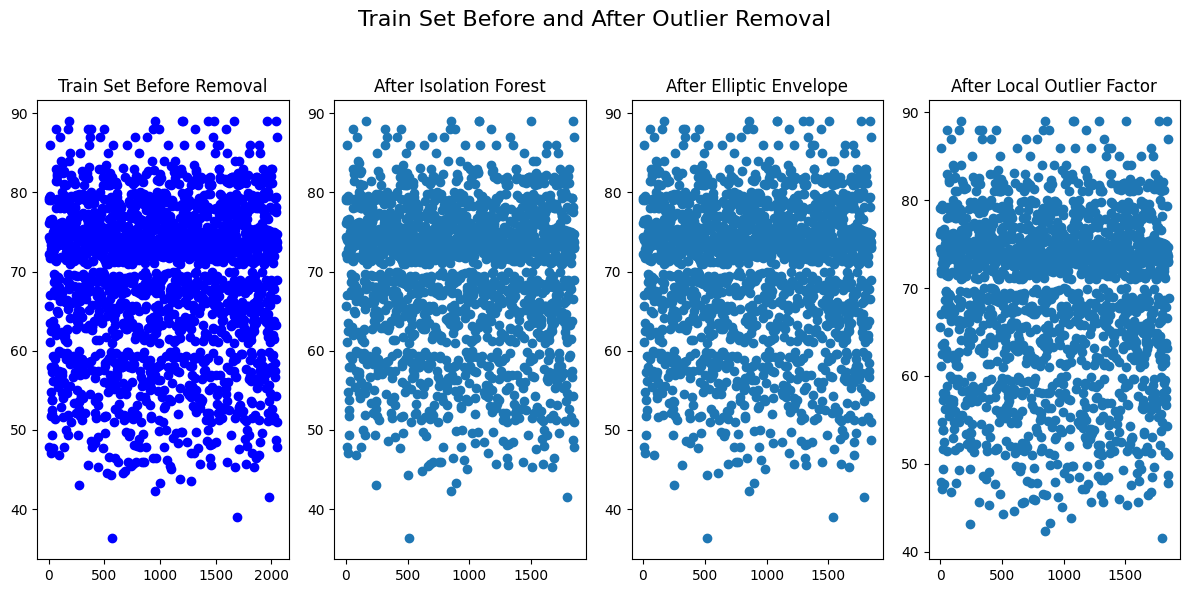

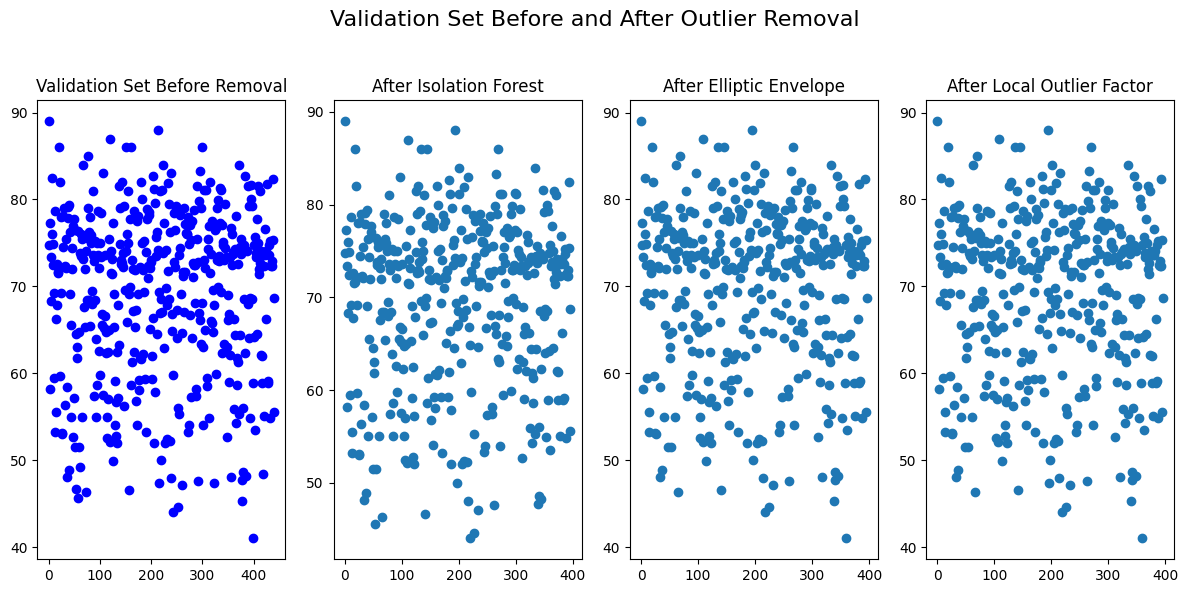

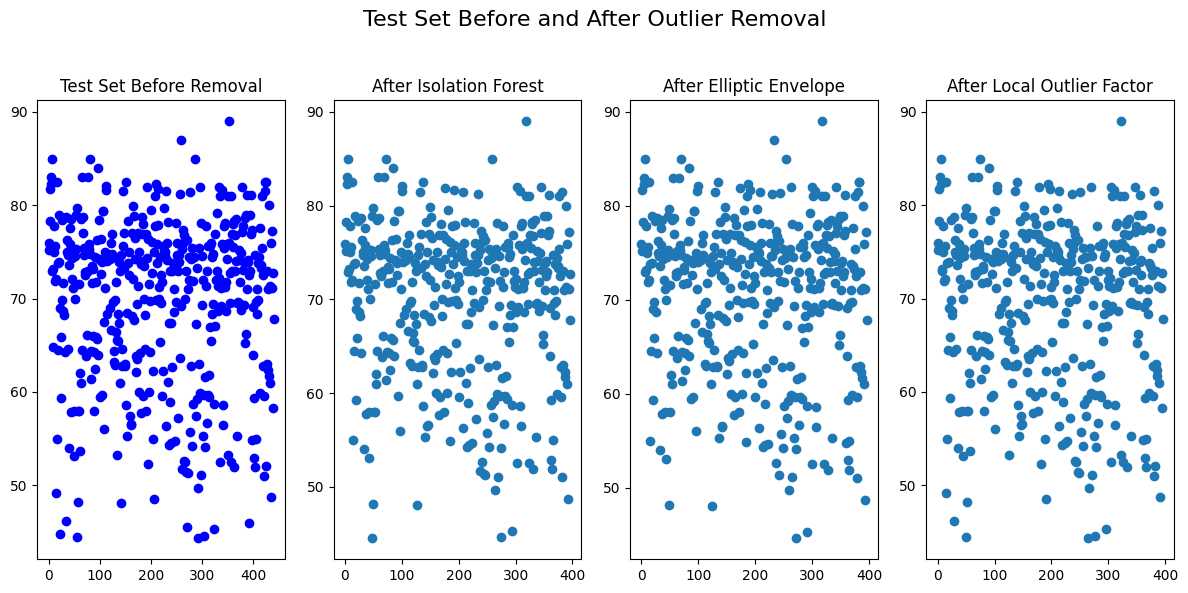

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def remove_outliers(X, y, model, model_name, novelty=False):
    if model_name == 'Local Outlier Factor':
        if novelty:
            # LOF with novelty=True for test data
            yhat = model.fit_predict(X)
        else:
            # LOF with novelty=False for training/validation data
            yhat = model.fit_predict(X)
    else:
        # For other models
        yhat = model.fit_predict(X)

    mask = yhat != -1
    return X[mask], y[mask]

# Modelli di rilevamento outlier
outlier_models = {
    'Isolation Forest': IsolationForest(contamination=0.1, random_state=42),
    'Elliptic Envelope': EllipticEnvelope(contamination=0.1, support_fraction=0.95, random_state=42),
    'Local Outlier Factor': LocalOutlierFactor(contamination=0.1, novelty=False)
}

# Dati originali (assumendo che X_train, X_val, X_test, y_train, y_val, y_test siano già definiti)
datasets = {'Train': (X_train, y_train), 'Validation': (X_val, y_val), 'Test': (X_test, y_test)}
results = {}

# Rimozione outlier e allenamento modelli
for name, (X, y) in datasets.items():
    for model_name, model in outlier_models.items():
        # Determina se siamo sui dati di test
        novelty = (name == 'Test' and model_name == 'Local Outlier Factor')
        X_clean, y_clean = remove_outliers(X.copy(), y.copy(), model, model_name, novelty)
        reg_model = LinearRegression().fit(X_clean, y_clean)
        y_pred = reg_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        results[(name, model_name)] = (X_clean, y_clean, mse)

# Stampa MSE e selezione del migliore
for (dataset, model_name), (_, _, mse) in results.items():
    print(f"MSE {dataset} dopo rimozione outlier con {model_name}: {mse}")

# Determinazione della tecnica con il MSE più basso per ogni set di dati
for dataset in ['Train', 'Validation', 'Test']:
    mse_values = {model_name: results[(dataset, model_name)][2] for model_name in outlier_models.keys()}
    best_technique = min(mse_values, key=mse_values.get)
    print(f'Tecnica con il MSE più basso nel set di {dataset.lower()}: {best_technique} (MSE: {mse_values[best_technique]})')

# Visualizzazione dei risultati
for name, (X, y) in datasets.items():
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'{name} Set Before and After Outlier Removal', fontsize=16)

    plt.subplot(1, len(outlier_models) + 1, 1)
    plt.scatter(range(len(y)), y, color='blue')
    plt.title(f'{name} Set Before Removal')

    for i, (model_name, _) in enumerate(outlier_models.items(), 2):
        X_clean, y_clean = results[(name, model_name)][:2]
        plt.subplot(1, len(outlier_models) + 1, i)
        plt.scatter(range(len(y_clean)), y_clean, label=model_name)
        plt.title(f'After {model_name}')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [ ]:
X = X_train
y = y_train

In [ ]:
print(X.shape)
print(y.shape)

(2056, 21)
(2056,)


## HPO Algorithm 6: Hyperband
Generate small-sized subsets and allocate budgets to each hyper-parameter combination based on its performance

**Advantages:**
* Enable parallelization.  

**Disadvantages:**  
* Not efficient with conditional HPs.
* Require subsets with small budgets to be representative.

In [ ]:
import warnings
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from scipy.stats import uniform, randint as sp_randint
import time

warnings.filterwarnings('ignore')

# Assuming X and y are feature matrix and target vector

results_hyperband = []

# Random Forest
rf_params = {
    'max_features': sp_randint(1, X.shape[1] + 1),
    'max_depth': sp_randint(5, 50),
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11),
    'criterion': ['friedman_mse']
}
clf_rf = RandomForestRegressor(random_state=0)
start_time = time.time()
Random_rf = RandomizedSearchCV(clf_rf, param_distributions=rf_params, n_iter=100, scoring='neg_mean_squared_error', random_state=0)
Random_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time, 2)

# Calcolo di R² per Random Forest
best_rf = Random_rf.best_estimator_
y_pred_rf = best_rf.predict(X)
r2_rf = r2_score(y, y_pred_rf)

results_hyperband.append({'Algorithm': 'Random Forest', 'Best Params': Random_rf.best_params_, 'MSE': -Random_rf.best_score_, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time_rf})

# SVM
svm_params = {
    'C': uniform(0, 1),
    'kernel': ['sigmoid', 'rbf', 'poly'],
    'gamma': ['scale']
}
svm_estimator = SVR(gamma='scale')
start_time = time.time()
Random_svm = RandomizedSearchCV(svm_estimator, svm_params, n_iter=100, scoring='neg_mean_squared_error', random_state=0)
Random_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time, 2)

# Calcolo di R² per SVM
best_svm = Random_svm.best_estimator_
y_pred_svm = best_svm.predict(X)
r2_svm = r2_score(y, y_pred_svm)

results_hyperband.append({'Algorithm': 'SVM', 'Best Params': Random_svm.best_params_, 'MSE': -Random_svm.best_score_, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time_svm})

# KNN
knn_params = {
    'n_neighbors': sp_randint(1, 20),
}
clf_knn = KNeighborsRegressor()
start_time = time.time()
Random_knn = RandomizedSearchCV(clf_knn, param_distributions=knn_params, n_iter=100, scoring='neg_mean_squared_error', random_state=0)
Random_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time, 2)

# Calcolo di R² per KNN
best_knn = Random_knn.best_estimator_
y_pred_knn = best_knn.predict(X)
r2_knn = r2_score(y, y_pred_knn)

results_hyperband.append({'Algorithm': 'KNN', 'Best Params': Random_knn.best_params_, 'MSE': -Random_knn.best_score_, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time_knn})

# ANN
ann_params = {
    'hidden_layer_sizes': [(sp_randint(10, 100).rvs(),) for _ in range(3)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': uniform(1e-6, 1),
    'batch_size': [16, 32, 64],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': uniform(1e-3, 1),
    'max_iter': [50, 100],
    'early_stopping': [True],
    'validation_fraction': [0.1]
}
ann_estimator = MLPRegressor()
start_time = time.time()
Random_ann = RandomizedSearchCV(ann_estimator, param_distributions=ann_params, n_iter=100, scoring='neg_mean_squared_error', random_state=0)
Random_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time, 2)

# Calcolo di R² per ANN
best_ann = Random_ann.best_estimator_
y_pred_ann = best_ann.predict(X)
r2_ann = r2_score(y, y_pred_ann)

results_hyperband.append({'Algorithm': 'ANN', 'Best Params': Random_ann.best_params_, 'MSE': -Random_ann.best_score_, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time_ann})

results_df_hyperband = pd.DataFrame(results_hyperband)

print("Results for Hyperband")
print(results_df_hyperband.to_string(index=False))

Results for Hyperband
    Algorithm                                                                                                                                                                                                                                                         Best Params       MSE       R²  Time Elapsed (s)
Random Forest                                                                                                                                                   {'criterion': 'friedman_mse', 'max_depth': 26, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}  3.880105 0.993164            408.27
          SVM                                                                                                                                                                                                        {'C': 0.9495710534507421, 'gamma': 'scale', 'kernel': 'rbf'} 14.814833 0.847687            126.94
          KNN                                

## HPO Algorithm 7: Genetic Algorithm
Genetic algorithms detect well-performing hyper-parameter combinations in each generation, and pass them to the next generation until the best-performing combination is identified.

**Advantages:**
* Efficient with all types of HPs.
* Not require good initialization.


**Disadvantages:**  
* Poor capacity for parallelization.

### Using DEAP

In [ ]:
#Results for Genetic Algorithm

import warnings
import numpy as np
import pandas as pd
import time
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from evolutionary_search import EvolutionaryAlgorithmSearchCV

warnings.filterwarnings("ignore", category=RuntimeWarning)

results_GA = []

# Funzione per calcolare R²
def calculate_r2(model, X, y):
    y_pred = model.predict(X)
    return r2_score(y, y_pred)

# Random Forest
rf_params = {
    'n_estimators': range(10, 100),
    'max_features': range(1, 13),
    'max_depth': range(5, 50),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'criterion': ['squared_error']
}
clf = RandomForestRegressor(random_state=0)
start_time = time.time()
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                    params=rf_params,
                                    scoring="neg_mean_squared_error",
                                    cv=3,
                                    verbose=0,
                                    population_size=10,
                                    gene_mutation_prob=0.10,
                                    gene_crossover_prob=0.5,
                                    tournament_size=3,
                                    generations_number=5,
                                    n_jobs=1)
ga1.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)
best_rf = ga1.best_estimator_
r2_rf = calculate_r2(best_rf, X, y)
results_GA.append({'Algorithm': 'Random Forest', 'Best Params': ga1.best_params_, 'MSE': -ga1.best_score_, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time})

# SVM
svm_params = {
    'C': np.random.uniform(0, 50, 1000),
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'epsilon': np.random.uniform(0, 1, 100),
}
clf = SVR(gamma='scale')
start_time = time.time()
ga2 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                    params=svm_params,
                                    scoring="neg_mean_squared_error",
                                    cv=3,
                                    verbose=0,
                                    population_size=10,
                                    gene_mutation_prob=0.10,
                                    gene_crossover_prob=0.5,
                                    tournament_size=3,
                                    generations_number=5,
                                    n_jobs=1)
ga2.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)
best_svm = ga2.best_estimator_
r2_svm = calculate_r2(best_svm, X, y)
results_GA.append({'Algorithm': 'SVM', 'Best Params': ga2.best_params_, 'MSE': -ga2.best_score_, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time})

# KNN
knn_params = {
    'n_neighbors': range(1, 20),
}
clf = KNeighborsRegressor()
start_time = time.time()
ga3 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                    params=knn_params,
                                    scoring="neg_mean_squared_error",
                                    cv=3,
                                    verbose=0,
                                    population_size=10,
                                    gene_mutation_prob=0.10,
                                    gene_crossover_prob=0.5,
                                    tournament_size=3,
                                    generations_number=5,
                                    n_jobs=1)
ga3.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)
best_knn = ga3.best_estimator_
r2_knn = calculate_r2(best_knn, X, y)
results_GA.append({'Algorithm': 'KNN', 'Best Params': ga3.best_params_, 'MSE': -ga3.best_score_, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time})

# ANN
def ANN(optimizer='adam', neurons=32, batch_size=32, epochs=50, activation='relu', patience=5, loss='mse'):
    input_layer = Input(shape=(X.shape[1],))
    x = Dense(neurons, activation=activation)(input_layer)
    x = Dense(neurons, activation=activation)(x)
    output_layer = Dense(1)(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience=patience)
    model.fit(X, y, batch_size=batch_size, epochs=epochs, callbacks=[early_stopping], verbose=0)
    return model

rf_params_ann = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'loss': ['mse'],
    'batch_size': [16, 32, 64],
    'neurons': list(range(10, 100)),
    'epochs': [20, 50],
    'patience': list(range(3, 20))
}

start_time = time.time()
clf_ann = KerasRegressor(model=ANN, optimizer='adam', activation='relu', neurons=32, epochs=50, patience=5, loss='mse', batch_size=16, verbose=0)
ga4 = EvolutionaryAlgorithmSearchCV(estimator=clf_ann,
                                   params=rf_params_ann,
                                   scoring="neg_mean_squared_error",
                                   cv=3,
                                   verbose=0,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=1)
ga4.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)
best_ann = ga4.best_estimator_
r2_ann = calculate_r2(best_ann, X, y)
results_GA.append({'Algorithm': 'ANN', 'Best Params': ga4.best_params_, 'MSE': -ga4.best_score_, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time})

results_df_GA = pd.DataFrame(results_GA)
print("Results for Genetic Algorithm")
print(results_df_GA.to_string(index=False))

Results for Genetic Algorithm
    Algorithm                                                                                                                            Best Params       MSE       R²  Time Elapsed (s)
Random Forest {'n_estimators': 89, 'max_features': 11, 'max_depth': 39, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'squared_error'}  4.439632 0.991399             33.03
          SVM                                                             {'C': 45.485303330540965, 'kernel': 'poly', 'epsilon': 0.1616948028863956}  8.363296 0.931973             15.96
          KNN                                                                                                                     {'n_neighbors': 5} 12.058614 0.929111              0.94
          ANN            {'optimizer': 'rmsprop', 'activation': 'relu', 'loss': 'mse', 'batch_size': 16, 'neurons': 96, 'epochs': 50, 'patience': 5}  9.067398 0.891323           1035.61


In [ ]:
# Lista dei DataFrame dei risultati e relativi percorsi per il salvataggio
results_dataframes = [
    (results_df_GA, '/content/results_GA.csv'),
    (results_df_hyperband, '/content/results_df_hyperband.csv'),
]

# Salvataggio dei risultati in file CSV
for results_df, file_path in results_dataframes:
    results_df.to_csv(file_path, index=False)

In [ ]:
import pandas as pd

# Crea un dizionario per contenere tutti i risultati
all_results = {}

# Carica i risultati dai file CSV
results_files = {
    '3_fold_cross_validation': 'results_3_fold.csv',
    'Grid Search': 'results_grid_search.csv',
    'Random Search': 'results_random_search.csv',
    'Hyperband': 'results_df_hyperband.csv',
    'Bayesian Optimization': 'results_bayes.csv',
    'Sequential Model-Based Optimization (skopt)': 'results_skopt.csv',
    'Bayesian Optimization TPE': 'results_bo_tpe.csv',
    'Particle Swarm Optimization': 'results_PSO.csv',
    'Genetic Algorithm': 'results_GA.csv',
    'TPOT': 'results_TPOT.csv',
}

for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Visualizza i risultati in un'unica tabella con le rispettive procedure e algoritmi associati
print("Results Summary:")
print("--------------------------------------------------------------------------------")
for procedure, results_df in all_results.items():
    print("Procedure:", procedure)
    print("--------------------------------------------------------------------------------")
    print(results_df.to_string(index=False))
    print("--------------------------------------------------------------------------------")

Results Summary:
--------------------------------------------------------------------------------
Procedure: 3_fold_cross_validation
--------------------------------------------------------------------------------
    Algorithm       MSE       R²  Time Elapsed (s)
Random Forest  4.212946 0.952961             25.75
          SVM 15.179601 0.829707              2.11
          KNN 11.728416 0.868422              0.11
          ANN 12.667394 0.843278             78.42
--------------------------------------------------------------------------------
Procedure: Grid Search
--------------------------------------------------------------------------------
    Algorithm                                                                                                                 Best Params       MSE       R²  Time Elapsed (s)
Random Forest                                                                                       {'max_depth': 20, 'n_estimators': 30}  4.392258 0.993335             17

In [ ]:
import csv

# Definire il percorso del file CSV
output_file = "best_hyperparameters_for_all.csv"

# Aprire il file CSV in modalità scrittura
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Scrivere l'intestazione del file CSV
    writer.writerow(["Procedura", "Algoritmo", "Best Params"])

    # Scrivere i migliori parametri per ogni procedura
    for procedure, results_df in all_results.items():
        if procedure != '3_fold_cross_validation':
            if 'Best Params' in results_df.columns:
                for index, row in results_df.iterrows():
                    writer.writerow([procedure, row['Algorithm'], row['Best Params']])
            else:
                print(f"Attenzione: 'Best Params' non trovata in {procedure}")

print("File CSV salvato con successo:", output_file)

Attenzione: 'Best Params' non trovata in TPOT
File CSV salvato con successo: best_hyperparameters_for_all.csv


In [ ]:
from tabulate import tabulate
from colorama import Fore, Style
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image
from sklearn.metrics import r2_score

# Carica i risultati dai file CSV
all_results = {}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Inizializza le variabili per i migliori MSE, R² e tempi
best_mse = {}
best_r2 = {}
best_time = {}

# Inizializza la lista per i dati della tabella
table_data = []

# Calcola i migliori MSE, R² e tempi per ogni procedura
for procedure, results_df in all_results.items():
    best_mse[procedure] = min(results_df['MSE'])
    best_r2[procedure] = max(results_df['R²'])  # Supponendo che l'R² sia memorizzato nel file CSV
    best_time[procedure] = min(results_df['Time Elapsed (s)'])

    # Popola la lista dei dati della tabella
    for index, row in results_df.iterrows():
        mse_value = row['MSE']
        r2_value = row['R²']  # Supponendo che l'R² sia memorizzato nel file CSV
        time_value = row['Time Elapsed (s)']
        algorithm = row['Algorithm']
        if mse_value == best_mse[procedure]:
            mse_value = f"{Fore.GREEN}{mse_value}{Style.RESET_ALL}"
            algorithm = f"{Fore.GREEN}{Style.BRIGHT}{algorithm}{Style.RESET_ALL}"
        if r2_value == best_r2[procedure]:
            r2_value = f"{Fore.CYAN}{r2_value}{Style.RESET_ALL}"
        if time_value == best_time[procedure]:
            time_value = f"{Fore.LIGHTGREEN_EX}{time_value}{Style.RESET_ALL}"
            algorithm = f"{Fore.LIGHTGREEN_EX}{Style.BRIGHT}{algorithm}{Style.RESET_ALL}"
        table_data.append([procedure, algorithm, mse_value, r2_value, time_value])

# Stampa la tabella dei risultati
table_headers = ["Procedure", "Algorithm", "MSE", "R²", "Time Elapsed (s)"]
print("Results Summary:")
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))

# Trova il miglior algoritmo per MSE, R² e tempo per ogni procedura
best_algorithm_mse = {}
best_algorithm_r2 = {}
best_algorithm_time = {}
overall_winner = min(all_results, key=lambda x: min(all_results[x]['MSE']) + min(all_results[x]['Time Elapsed (s)']))

for procedure, results_df in all_results.items():
    best_mse_index = results_df['MSE'].idxmin()
    best_r2_index = results_df['R²'].idxmax()  # Supponendo che l'R² sia memorizzato nel file CSV
    best_time_index = results_df['Time Elapsed (s)'].idxmin()
    best_algorithm_mse[procedure] = results_df.loc[best_mse_index, 'Algorithm']
    best_algorithm_r2[procedure] = results_df.loc[best_r2_index, 'Algorithm']  # Supponendo che l'R² sia memorizzato nel file CSV
    best_algorithm_time[procedure] = results_df.loc[best_time_index, 'Algorithm']

# Inizializza le liste per le tabelle dei vincitori
winners_table = []
overall_winner_table = []

# Popola le tabelle dei vincitori
for procedure, results_df in all_results.items():
    mse_winner = best_algorithm_mse[procedure]
    r2_winner = best_algorithm_r2[procedure]  # Supponendo che l'R² sia memorizzato nel file CSV
    time_winner = best_algorithm_time[procedure]
    mse_value = results_df.loc[results_df['Algorithm'] == mse_winner, 'MSE'].values[0]
    r2_value = results_df.loc[results_df['Algorithm'] == r2_winner, 'R²'].values[0]  # Supponendo che l'R² sia memorizzato nel file CSV
    time_value = results_df.loc[results_df['Algorithm'] == time_winner, 'Time Elapsed (s)'].values[0]
    winners_table.append([procedure, mse_winner, mse_value, r2_value, time_winner, time_value])
    if procedure == overall_winner:
        overall_winner_table.append([procedure, mse_winner, mse_value, r2_value, time_winner, time_value])

# Stampa la tabella dei risultati dei vincitori
print("Best algorithm and procedure Summary:")
print(tabulate(winners_table, headers=["Procedure", "MSE Algorithm", "MSE", "R²", "Time Algorithm", "Time Elapsed (s)"], tablefmt="grid"))
print("\nOverall Best algorithm and procedure:")
print(tabulate(overall_winner_table, headers=["Procedure", "MSE Algorithm", "MSE", "R²", "Time Algorithm", "Time Elapsed (s)"], tablefmt="grid"))


Results Summary:
+---------------------------------------------+---------------+-------------+----------+--------------------+
| Procedure                                   | Algorithm     |         MSE |       R² |   Time Elapsed (s) |
+=============================================+===============+=============+==========+====================+
| 3_fold_cross_validation                     | Random Forest |    4.21295  | 0.952961 |              25.75 |
+---------------------------------------------+---------------+-------------+----------+--------------------+
| 3_fold_cross_validation                     | SVM           |   15.1796   | 0.829707 |               2.11 |
+---------------------------------------------+---------------+-------------+----------+--------------------+
| 3_fold_cross_validation                     | KNN           |   11.7284   | 0.868422 |               0.11 |
+---------------------------------------------+---------------+-------------+----------+---------------

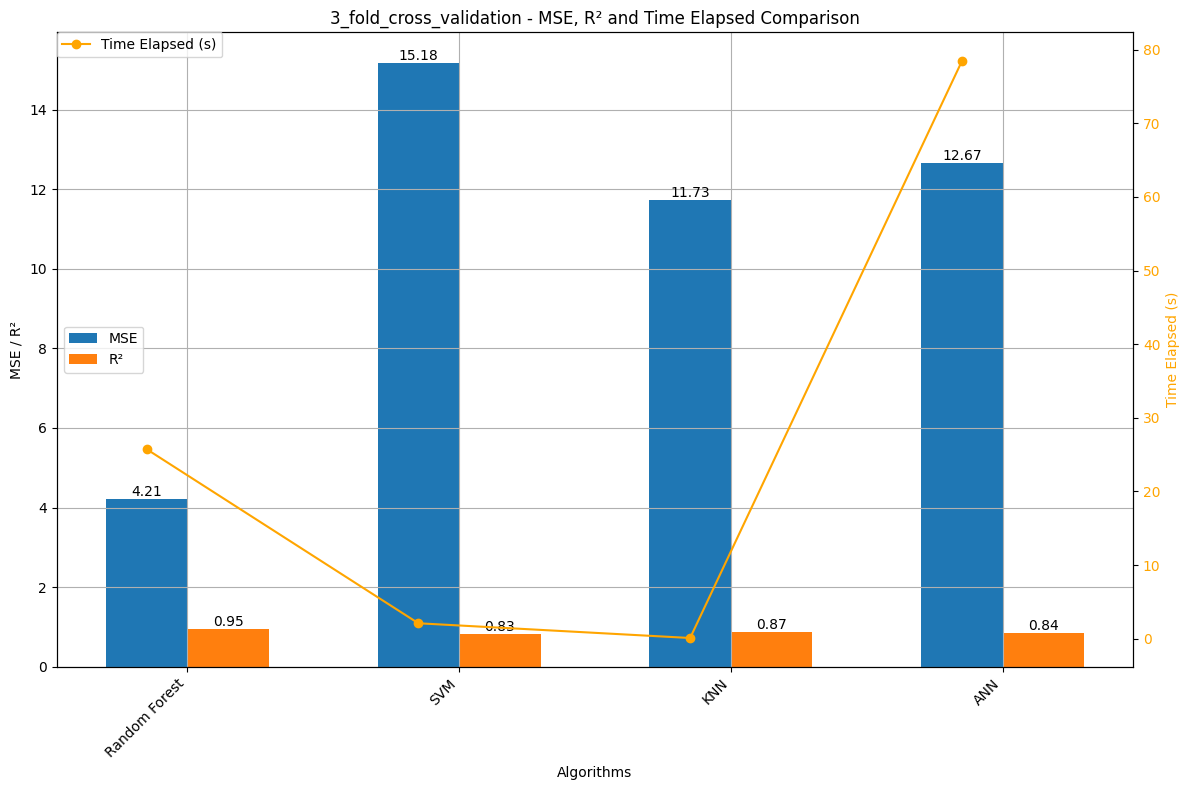

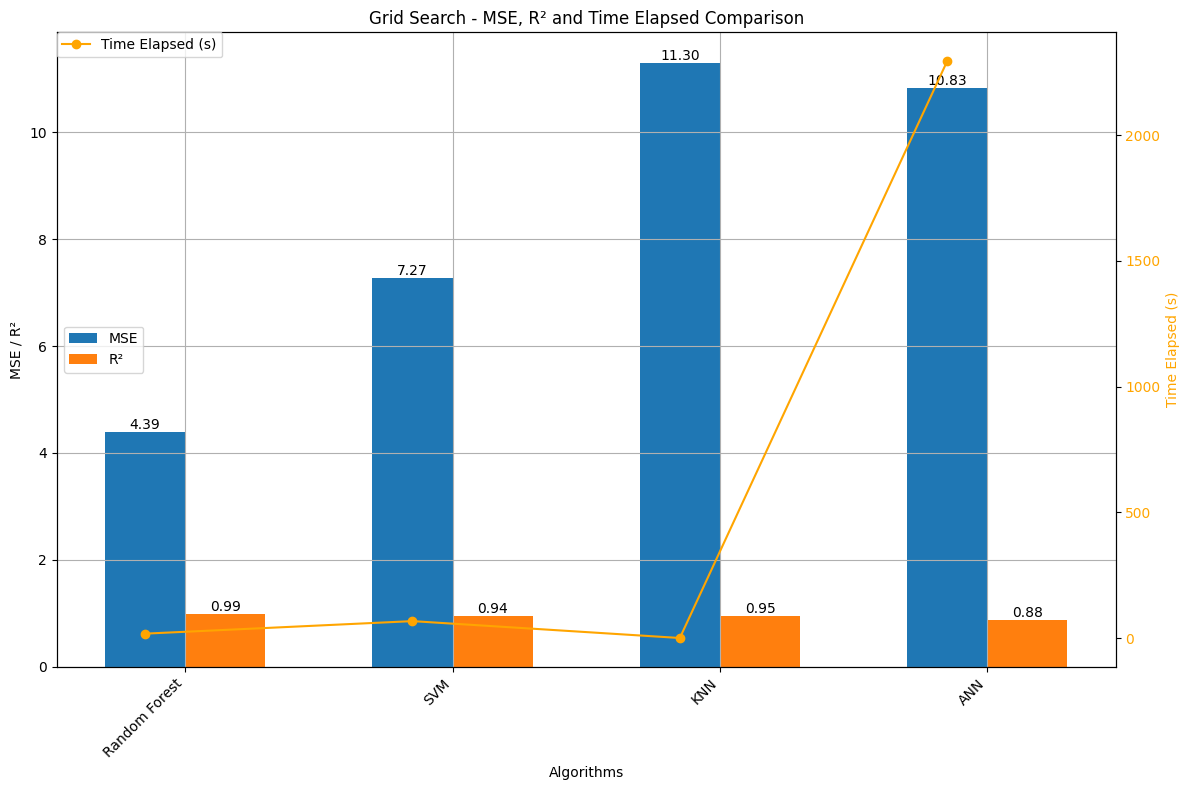

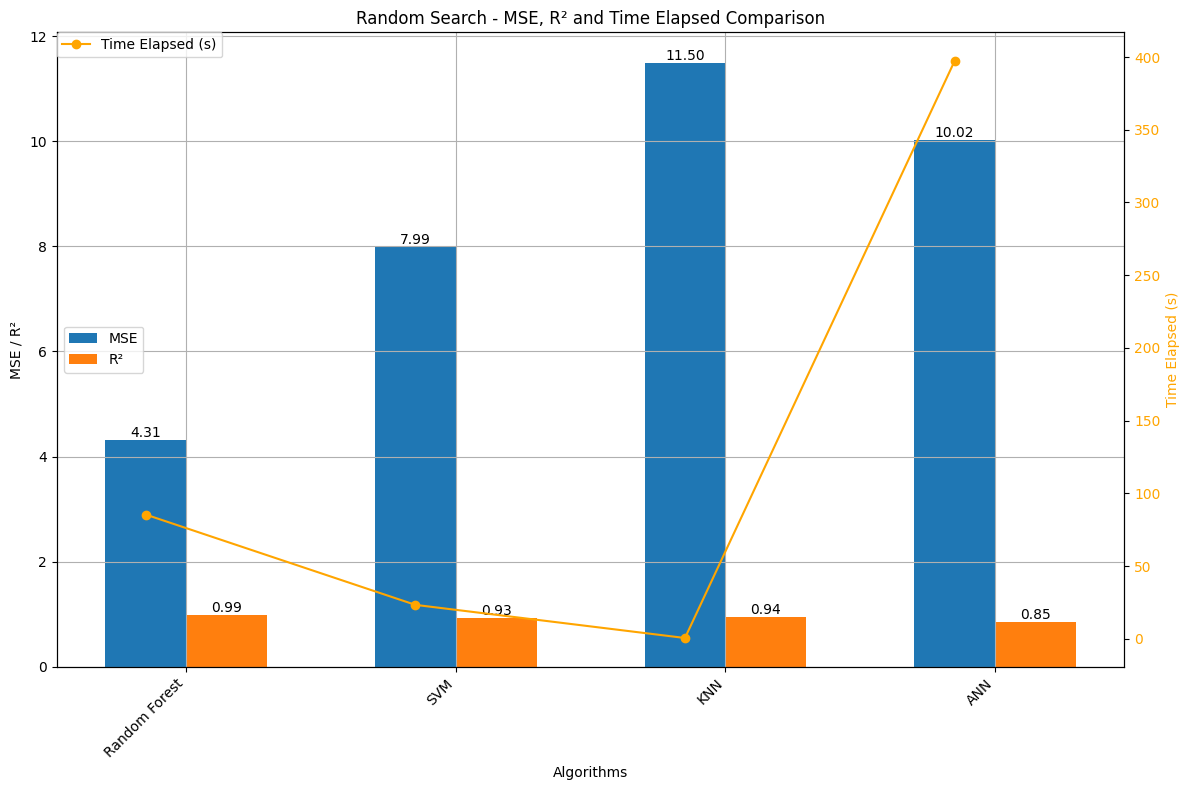

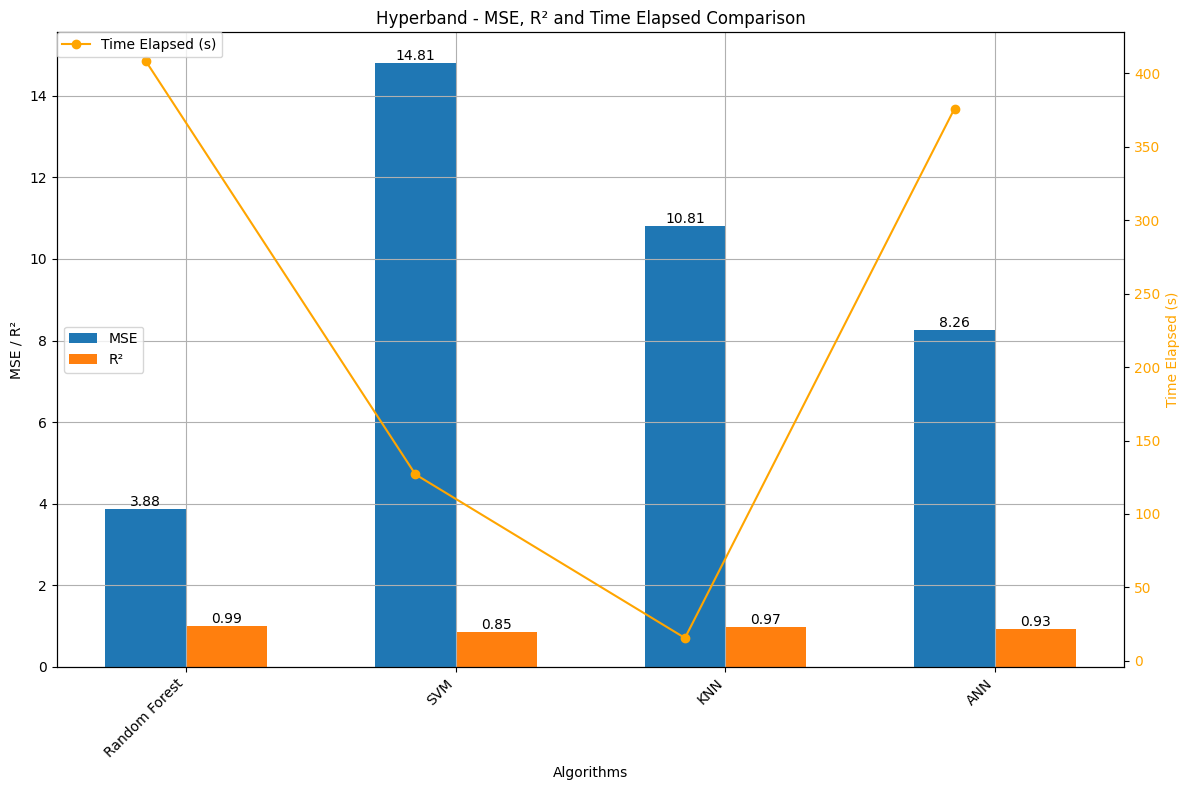

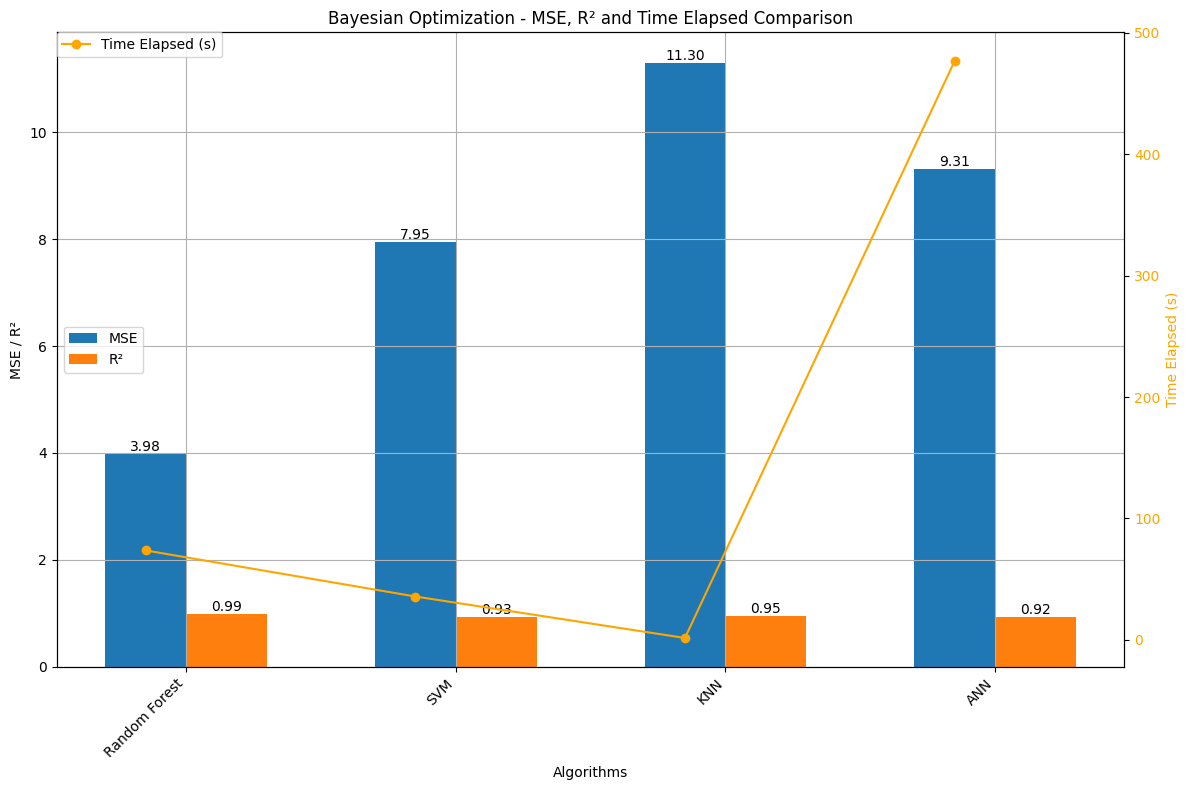

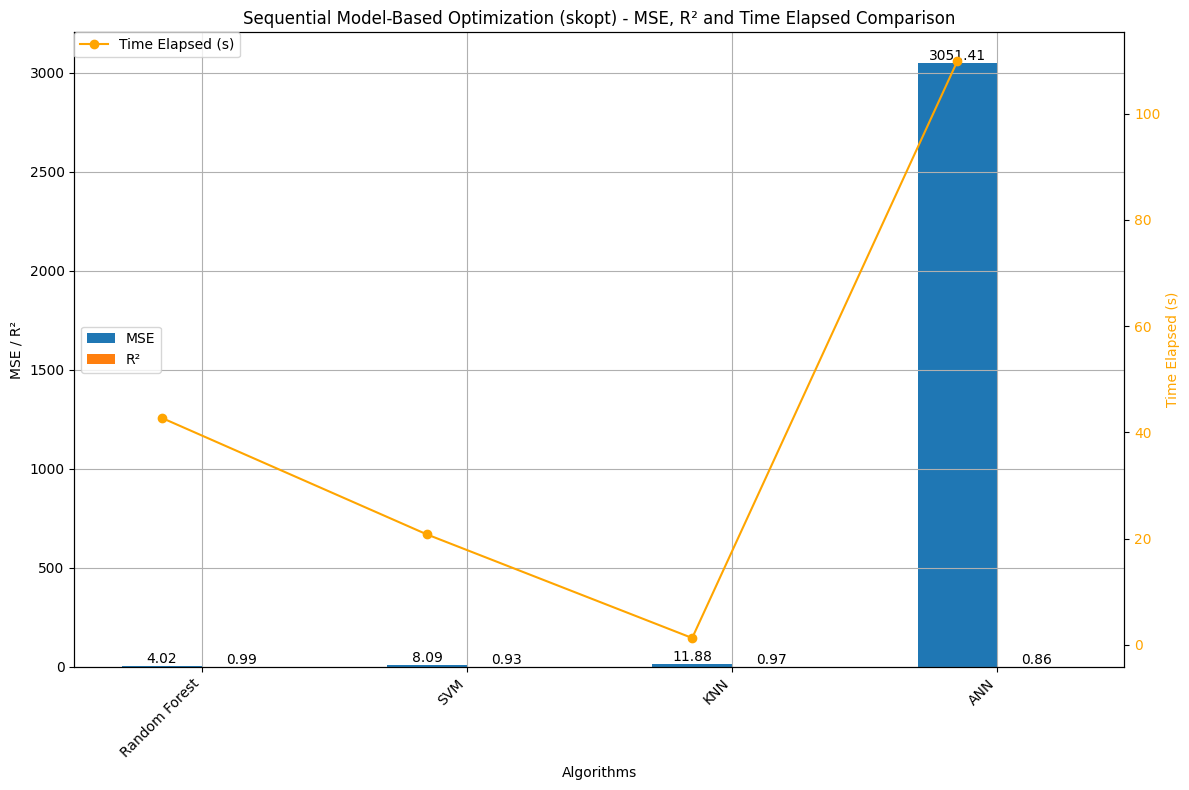

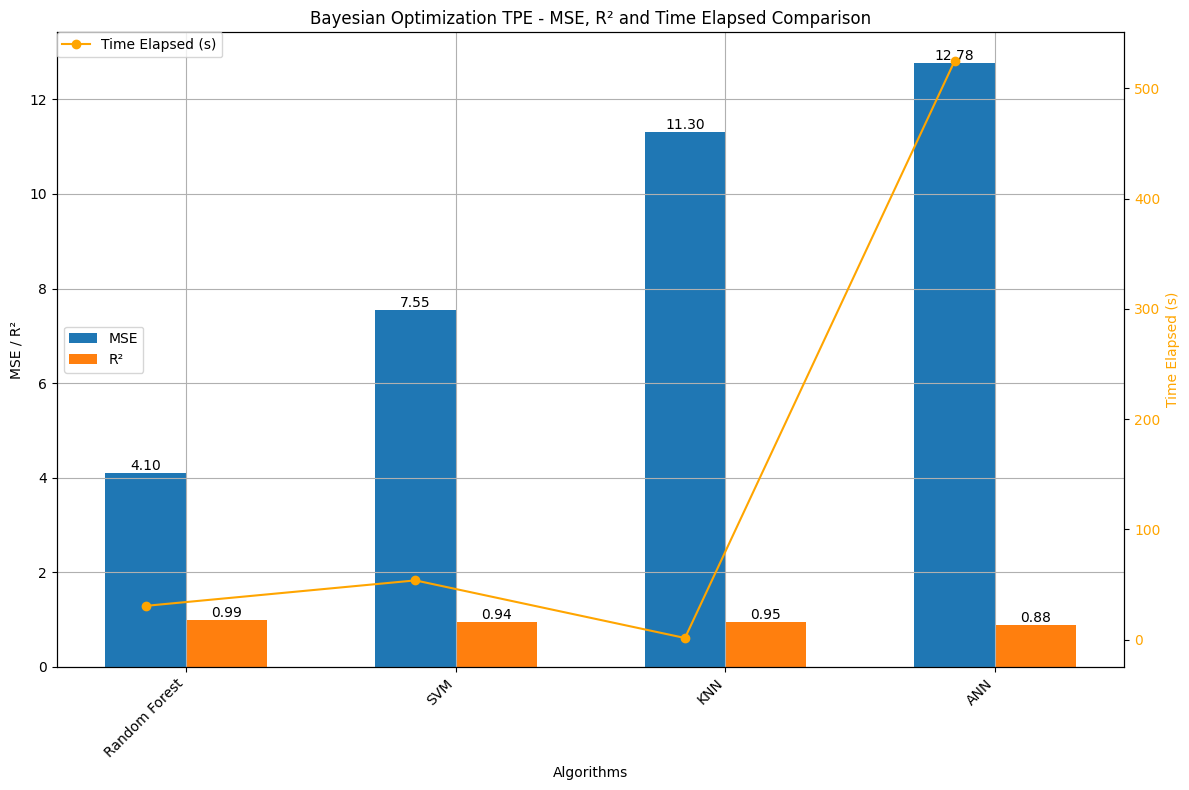

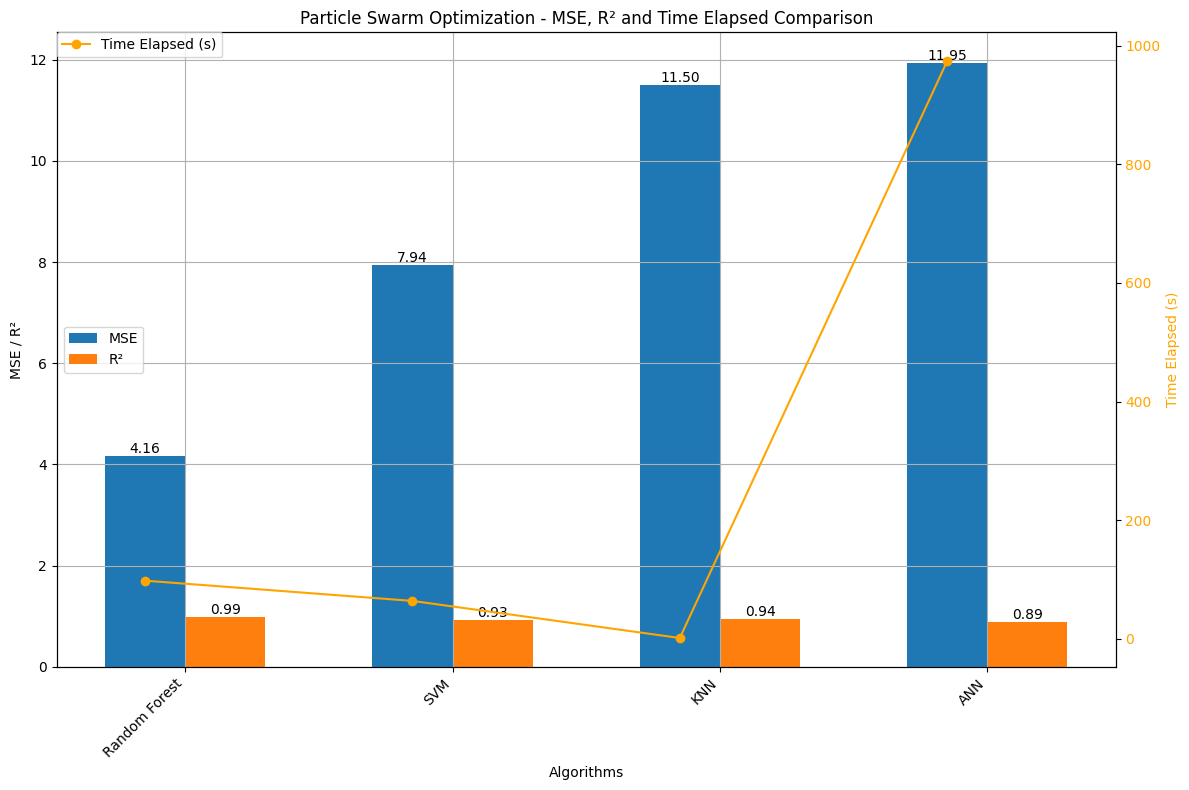

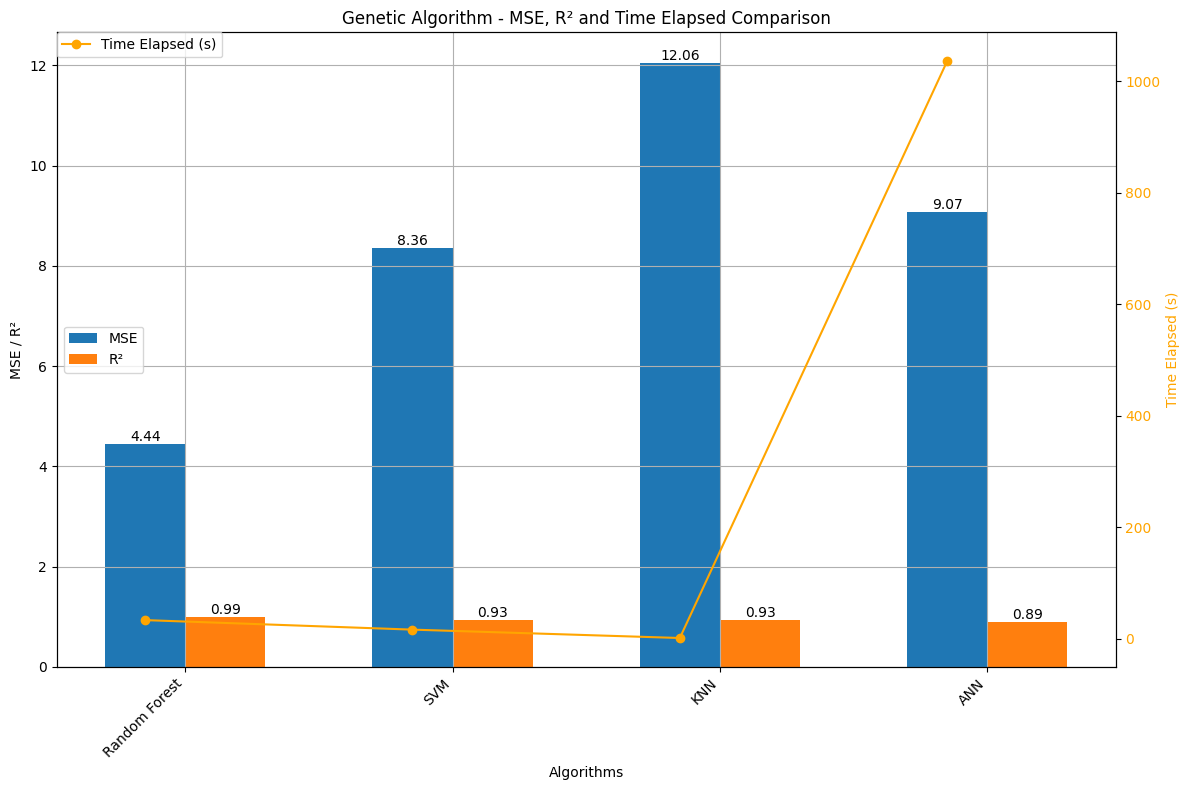

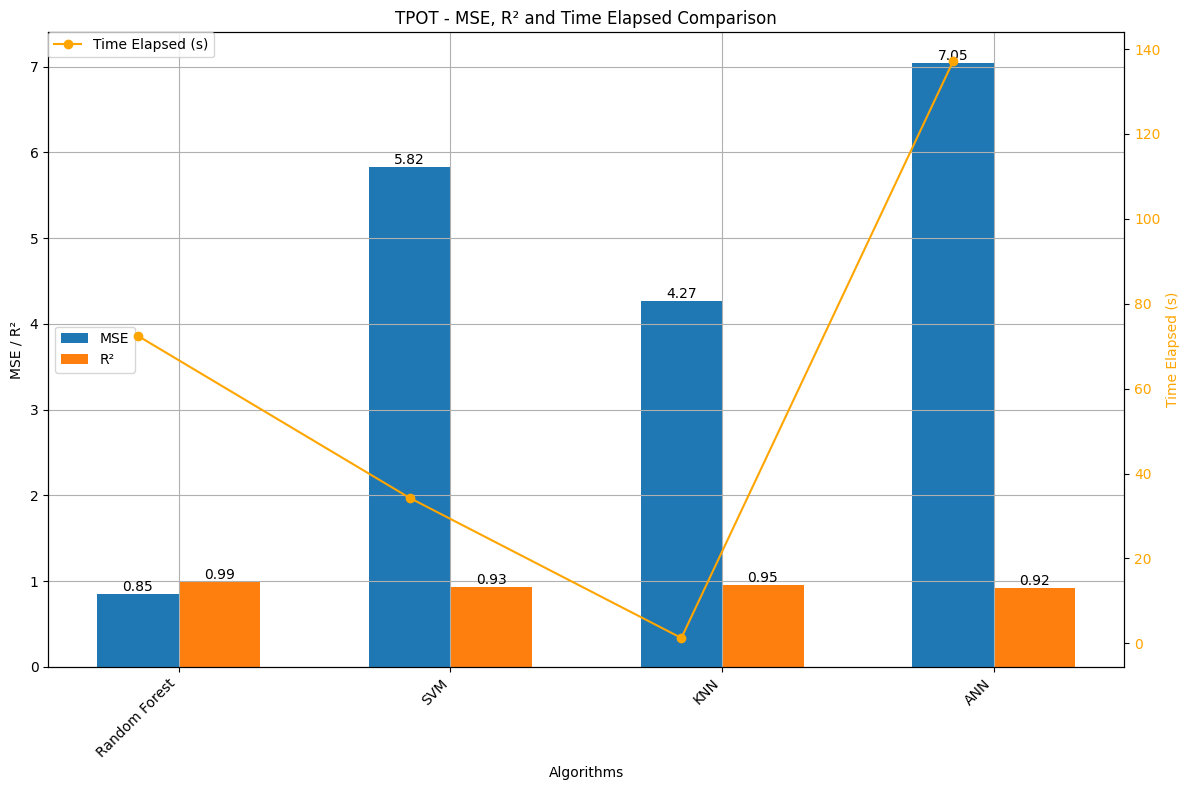

In [ ]:
all_results = {}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Inizializza i dati per il grafico
plot_data = {}
metrics = ['MSE', 'R²']

# Popola i dati per il grafico
for procedure, results_df in all_results.items():
    plot_data[procedure] = {
        'Algorithms': results_df['Algorithm'].tolist(),
        'MSE': results_df['MSE'].tolist(),
        'R²': results_df['R²'].tolist(),
        'Time Elapsed (s)': results_df['Time Elapsed (s)'].tolist()
    }

# Crea i grafici per ogni procedura
for procedure, data in plot_data.items():
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(f'{procedure} - MSE, R² and Time Elapsed Comparison')  # Titolo del grafico

    # Grafico a barre per MSE e R²
    bar_width = 0.3
    index = range(len(data['Algorithms']))

    bars = {}
    for i, metric in enumerate(metrics):
        bars[metric] = ax1.bar([x + i * bar_width for x in index], data[metric], bar_width, label=metric)

    ax1.set_xlabel('Algorithms')
    ax1.set_ylabel('MSE / R²')
    ax1.set_xticks([x + (len(metrics) - 1) * bar_width / 2 for x in index])
    ax1.set_xticklabels(data['Algorithms'], rotation=45, ha='right')

    # Aggiungi etichette per i valori sui bar
    for metric, bar in bars.items():
        for b, value in zip(bar, data[metric]):
            height = b.get_height()
            ax1.text(b.get_x() + b.get_width() / 2, height, '{:.2f}'.format(value), ha='center', va='bottom')

    # Grafico a linee per il tempo
    ax2 = ax1.twinx()
    ax2.plot(data['Algorithms'], data['Time Elapsed (s)'], marker='o', color='orange', label='Time Elapsed (s)')
    ax2.set_ylabel('Time Elapsed (s)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Aggiungi le legende
    ax1.legend(loc='center left', bbox_to_anchor=(0, 0.5), prop={'size': 10})  # Legenda per MSE e R²
    ax2.legend(loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0., prop={'size': 10})  # Legenda per il tempo

    ax1.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
all_results = {}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Inizializza i dati per il grafico
plot_data = {}
metrics = ['MSE', 'R²']

# Popola i dati per il grafico
for procedure, results_df in all_results.items():
    plot_data[procedure] = {
        'Algorithms': results_df['Algorithm'].tolist(),
        'MSE': results_df['MSE'].tolist(),
        'R²': results_df['R²'].tolist(),
        'Time Elapsed (s)': results_df['Time Elapsed (s)'].tolist()
    }

# Inizializza le strutture per le tabelle
winners_table = []
overall_winner_table = []

# Trova il procedimento complessivo con il miglior R² massimo
overall_best_r2_proc = max(all_results, key=lambda x: all_results[x]['R²'].max())

# Popola le tabelle dei vincitori
for procedure, results_df in all_results.items():
    row = [procedure]

    for metric in metrics:
        if metric == 'MSE':
            best_index = results_df[metric].idxmin()
        else:
            best_index = results_df[metric].idxmax()

        best_algorithm = results_df.loc[best_index, 'Algorithm']
        best_value = results_df.loc[results_df['Algorithm'] == best_algorithm, metric].values[0]
        row.append(best_algorithm)
        row.append(best_value)

    time_winner = results_df.loc[results_df['Time Elapsed (s)'].idxmin(), 'Algorithm']
    time_value = results_df.loc[results_df['Algorithm'] == time_winner, 'Time Elapsed (s)'].values[0]
    row.extend([time_winner, time_value])

    winners_table.append(row)

    if procedure == overall_best_r2_proc:
        overall_winner_table.append(row)

# Definisci le intestazioni delle colonne per le tabelle
headers = ["Procedure", "MSE Winner", "MSE Value", "R² Winner", "R² Value", "Time Winner", "Time Elapsed (s)"]

# Specifica il percorso del file PDF in cui salvare i vincitori
pdf_file_path = "Overall_Results_Regression.pdf"

# Crea un oggetto PdfPages per gestire il file PDF
with PdfPages(pdf_file_path) as pdf:
    # Aggiungi i grafici al PDF
    for procedure, data in plot_data.items():
        fig, ax1 = plt.subplots(figsize=(12, 8))
        plt.title(f'{procedure} - MSE, R² and Time Elapsed Comparison')  # Titolo del grafico

        # Grafico a barre per MSE e R²
        bar_width = 0.3
        index = range(len(data['Algorithms']))

        bars = {}
        for i, metric in enumerate(metrics):
            bars[metric] = ax1.bar([x + i * bar_width for x in index], data[metric], bar_width, label=metric)

        ax1.set_xlabel('Algorithms')
        ax1.set_ylabel('MSE / R²')
        ax1.set_xticks([x + (len(metrics) - 1) * bar_width / 2 for x in index])
        ax1.set_xticklabels(data['Algorithms'], rotation=45, ha='right')

        # Aggiungi etichette per i valori sui bar
        for metric, bar in bars.items():
            for b, value in zip(bar, data[metric]):
                height = b.get_height()
                ax1.text(b.get_x() + b.get_width() / 2, height, '{:.2f}'.format(value), ha='center', va='bottom')

        # Grafico a linee per il tempo
        ax2 = ax1.twinx()
        ax2.plot(data['Algorithms'], data['Time Elapsed (s)'], marker='o', color='orange', label='Time Elapsed (s)')
        ax2.set_ylabel('Time Elapsed (s)', color='orange')
        ax2.tick_params(axis='y', labelcolor='orange')

        # Aggiungi le legende
        ax1.legend(loc='center left', bbox_to_anchor=(0, 0.5), prop={'size': 10})  # Legenda per MSE e R²
        ax2.legend(loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0., prop={'size': 10})  # Legenda per il tempo

        ax1.grid(True)
        plt.tight_layout()
        pdf.savefig()
        plt.close()

    # Aggiungi la tabella "Best algorithm and procedure Summary"
    fig = plt.figure(figsize=(20, 12))
    plt.text(0.5, 0.98, "Best Algorithm and Procedure Summary:", horizontalalignment='center', verticalalignment='top', fontsize=18, fontweight='bold')
    table = plt.table(cellText=winners_table, colLabels=headers, loc='center', cellLoc='center', colColours=['lightgrey']*len(headers))
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1.5, 1.8)
    plt.axis('off')
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0.5)
    plt.close(fig)

    # Aggiungi la tabella "Overall Best Algorithm and Procedure"
    fig = plt.figure(figsize=(20, 12))
    plt.text(0.5, 0.98, "Overall Best Algorithm and Procedure:", horizontalalignment='center', verticalalignment='top', fontsize=18, fontweight='bold')
    table = plt.table(cellText=overall_winner_table, colLabels=headers, loc='center', cellLoc='center', colColours=['lightgrey']*len(headers))
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1.5, 1.8)
    plt.axis('off')
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0.5)
    plt.close(fig)

print(f"Le tabelle degli Overall Results sono state aggiunte al file PDF: {pdf_file_path}")

Le tabelle degli Overall Results sono state aggiunte al file PDF: Overall_Results_Regression.pdf
